# Exploratory Data Analysis of CrossFit Open 2019 Dataset

In [615]:
# pip install jupyterlab "ipywidgets>=7.5"
# jupyter labextension install jupyterlab-plotly@4.14.3
# jupyter labextension install @jupyter-widgets/jupyterlab-manager plotlywidget@4.14.3
# pip install squarify

# import relevant libraries

import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import math
import plotly.io as pio
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import squarify

import EDA_plots as plot

import warnings

# set options
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.plotting.backend = "plotly"
pio.renderers.default = 'iframe' # or 'notebook' or 'colab'

In [2]:
# read clean Open 2019 dataset and drop unnamed column
df = pd.read_csv('./data/19_clean.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [3]:
df.head()

,competitorid,firstname,lastname,gender,countryoforiginname,affiliatename,age,height,weight,overallrank,overallscore,is_scaled,division,rank_1,rank_2,rank_3,rank_4,rank_5,time_2,time_3,time_4,time_5,scaled_1,scaled_2,scaled_3,scaled_4,scaled_5,score_1,score_2,score_3,score_4,score_5,bs_backsquat,bs_cleanandjerk,bs_snatch,bs_deadlift,bs_fightgonebad,bs_maxpull_ups,bs_fran,bs_grace,bs_helen,bs_filthy50,bs_sprint400m,bs_run5k,w1_reps_total,w2_reps_total,w2_reps_t2b,w2_reps_du,w2_reps_sqcl,w2_rounds_completed,w2_tiebreak,w3_reps_total,w3_5ft_reps_ohl,w3_reps_dbbsu,w3_reps_hspu,w3_hspu_status,w3_5ft_reps_hsw,w3_rounds_completed,w3_tiebreak,w4_reps_total,w4_reps_sn,w4_reps_bp,w4_reps_bmu,w4_bmu_status,w4_tiebreak,w5_reps_total,w5_reps_thr,w5_reps_c2bpu,region,BMI
0,86,Justin,Bergh,M,United States,CrossFit HQ,37.0,1.96,102.06,53022,304948,0,Men,15232,58534,59298,85576,86308,480.0,600.0,720.0,1200.0,0,0,0,0,0,13040000,11670764,10980237,10720255,11350000,151.0,120.0,95.0,188.0,393.0,32.0,226.0,174.0,496.0,1287.0,64.0,1325.0,304.0,167.0,50.0,100.0,17.0,1.88,436.0,98.0,40.0,50.0,8.0,1.0,0.0,2.16,363.0,72.0,30.0,36.0,6.0,1.0,465.0,135.0,75.0,60.0,USA,26.6
1,88,Cary,Hair,M,United States,CrossFit Santa Cruz,34.0,1.83,86.64,4361,37192,0,Men,5891,5456,7199,13060,5586,720.0,600.0,720.0,882.0,0,0,0,0,0,13240000,12620599,11330328,11170505,12100318,206.0,142.0,120.0,234.0,407.0,54.0,140.0,109.0,448.0,1103.0,54.0,1294.0,324.0,262.0,75.0,150.0,37.0,2.98,601.0,133.0,40.0,50.0,43.0,1.0,0.0,2.86,NaN,117.0,30.0,60.0,27.0,1.0,215.0,210.0,105.0,105.0,USA,25.9
2,92,Tim,Chan,M,United States,CrossFit SoCal,49.0,1.68,73.03,117405,564929,0,Men,155079,102548,127946,76177,103179,480.0,600.0,720.0,1200.0,0,0,0,0,0,11710000,11021027,10510000,10770250,11090000,102.0,92.0,70.0,138.0,NaN,35.0,262.0,281.0,645.0,1661.0,NaN,NaN,171.0,102.0,37.0,50.0,15.0,1.14,173.0,51.0,40.0,11.0,0.0,0.0,0.0,1.22,600.0,77.0,30.0,37.0,10.0,1.0,470.0,109.0,60.0,49.0,USA,25.9
3,93,Leif,Edmundson,M,United States,CrossFit HQ,37.0,1.83,92.99,38765,237798,0,Men,50223,39468,78855,40425,28827,480.0,600.0,720.0,1200.0,0,0,0,0,0,12670000,11720803,10920171,10970472,12010000,138.0,106.0,83.0,161.0,403.0,45.0,220.0,154.0,493.0,1500.0,62.0,1239.0,267.0,172.0,50.0,100.0,22.0,1.93,397.0,92.0,40.0,50.0,2.0,1.0,0.0,2.04,429.0,97.0,30.0,48.0,19.0,1.0,248.0,201.0,105.0,96.0,USA,27.8
4,1617,John,Mclaughlin,M,United States,CrossFit Palm Beach,51.0,1.78,84.82,12050,89855,0,Men,12686,26138,26923,13629,10479,480.0,600.0,720.0,999.0,0,0,0,0,0,13080000,11760858,11130242,11170482,12100201,161.0,115.0,88.0,197.0,NaN,50.0,146.0,154.0,444.0,NaN,NaN,NaN,308.0,176.0,50.0,100.0,26.0,1.98,342.0,113.0,40.0,50.0,23.0,1.0,0.0,2.46,358.0,117.0,30.0,60.0,27.0,1.0,238.0,210.0,105.0,105.0,USA,26.8


In [4]:
df.shape

(338538, 70)

---
## Workout Descriptions

### 19.1

AMRAP'15: 19 Wallball Shots / 19 Calories Row

Rx:
* Men: 20lb medball to 10ft target
* Women: 14lb medball to 9ft target

Scaling:
* Men: 14lb medball to 10ft target
* Women: 10lb medball to 9ft target

Score: total number of reps/cals

### 19.2

For time (time cap '20):
* AMRAP'8: 25 T2B / 50 DU / 15 Squat-Clean / 25 T2B / 50 DU / 13 Squat-Clean
* AMRAP'4 (if completed before 8 minutes): 25 T2B / 50 DU / 11 Squat-Clean
* AMRAP'4 (if completed before 12 minutes): 25 T2B / 50 DU / 9 Squat-Clean
* AMRAP'4 (if completed before 16 minutes): 25 T2B / 50 DU / 7 Squat-Clean

Rx:
* Men: Squat-Clean ladder 135-185-225-275-315 lb
* Women: Squat-Clean ladder 85-115-145-175-205 lb

Scaling:

Men:
* Squat-Clean ladder 95-115-135-155-185 lb
* Hanging Knee Raises instead of Toes-2-Bar
* Single Unders instead of Double Unders

Women:
* Squat-Clean ladder 55-75-95-115-135 lb
* Hanging Knee Raises instead of Toes-2-Bar
* Single Unders instead of Double Unders

Score: total number of reps / time for finishing the whole workout

### 19.3

For time (time cap '10):
* 200ft dumbbell overhead lunges
* 50 dumbbell box step-ups
* 50 strict handstand push-ups
* 200ft handstand walk

Rx:
* Men: 50lb dumbbell & 24in box
* Women: 35lb dumbbell & 20in box

Scaling (Men and Women):
* front rack lunges instead of overhead lunges
* 5in elevated strict handstand push-ups instead of no elevation
* bear crawl instead of handstand walk

Score: total number of reps / time for finishing the whole workout

### 19.4

For total time (time cap '12):
* 3 rounds of:
  - 10 snatches
  - 12 bar-facing burpees
* 3 minutes rest before continuing
* 3 rounds of:
  - 10 bar muscle-ups
  - 12 bar-facing burpees

Rx:
* Men: 95lb barbell
* Women: 65lb barbell

Scaling:
* chin-over-bar pull-ups instead of bar muscle-ups
* step over bar on the burpees is allowed
* Men: 65lb barbell
* Women: 45lb barbell

Score: total number of reps / time for finishing the whole workout

### 19.5

33-27-21-15-9 reps for time (time cap '20) of:
* thrusters
* chest-to-bar pull-ups

Rx:
* Men: 95lb barbell
* Women: 65lb barbell

Scaling:
* jumping pull-ups instead of chest-to-bar pull-ups
* Men: 65lb barbell
* Women: 45lb barbell

Score: total number of reps / time for finishing the whole workout

---
## Feature Explanation

#### personal information
* competitorid: unique identification number of an athlete
* firstname & lastname: of the athlete
* gender whether it's male (M) or female (F)
* countryoforigincode: abbreviation of an athlete's home country
* affiliatename: the name of the crossfit box an athlete belongs to
* age: age in years
* height: in meter
* weight: in kg
* BMI: body-mass-index of an athlete

#### workout information:
* overallrank is the overall rank after all workouts are taken into account
* overallscore: the score an athlete reached after all workouts
* is_scaled: classification wheter an athlete is doing the workouts in scaled or Rx variation
* division: the division an athlete belongs to (note: divisions differ from 'Men' or 'Women' only if an athlete doesn't belong to it at all)
* rank_i (1-5): the ranks of each individual workout
* time_i (2-5): the time after completing a workout
* scaled_i (1-5): classification wheter an athlete did a single workout in Rx or scaled
* score_i (1-5) the score of each individual workout
* 19.1:
  - w1_reps_total: total number of all workout repetitions
* 19.2:
  - w2_reps_total: total number of all workout repetitions
  - w2_reps_t2b: repetitions of Toes-to-Bar completed
  - w2_reps_du: repetitions of Double Unders completed
  - w2_reps_sqcl: repetitions of Squat Cleans completed
  - w2_rounds_completed: number of rounds completed (every round ends with the last Squat Clean per weight)
  - w2_tiebreak: tiebreak time after the last repetition of Double Unders
* 19.3:
  - w3_reps_total: total number of all workout repetitions
  - w3_5ft_reps_ohl: amount of 5ft distance of Walking Overhead Lunges
  - w3_reps_dbbsu: repetitions of Dumbbell Box Step-Ups
  - w3_reps_hspu: repetitions of strict Handstand Push-Ups
  - w3_hspu_status: ability to perform minimum one strict Handstand Push-Up
  - w3_5ft_reps_hsw: amount of 5ft distance of Handstand Walk
  - w3_rounds_completed: number of rounds completed (every round ends with the last repetition of an exercise)
  - w3_tiebreak: tiebreak time after final Box Step-Up or final Handstand Push-Up
* 19.4:
  - w4_reps_total: total number of all workout repetitions
  - w4_reps_sn: repetitions of Snatches
  - w4_reps_bp: repetitions of Bar-facing Burpees
  - w4_reps_bmu: repetitions of Bar Muscle-Ups
  - w4_bmu_status: ability to perform minimum one Bar Muscle-Up
  - w4_tiebreak: tiebreak time after final Burpee before first Bar Muscle-Up (there will be no tiebreak time if the workout is completed prior to the time cap
* 19.5:
  - w5_reps_total: total number of all workout repetitions
  - w5_reps_thr: repetitions of Thrusters
  - w5_reps_c2bpu: repetitions of Chest-to-Bar Pull-Ups

#### benchmark statistics
* bs_backsquat: weight in kg for 1-repetition-maximum (1RM) of Backsquat
* bs_cleanandjerk: weight in kg for 1RM of Clean&Jerk
* bs_snatch: weight in kg for 1RM of Snatch
* bs_deadlift: weight in kg for 1RM of Deadlift
* bs_fightgonebad: number of total repetitions for workout "Fight Gone Bad", consisting of 3 rounds of: 1min Wallball Shots (9/6kg) - 1min Sume Deadlift Highpulls (34/25kg) - 1min Boxjumps (51cm) - 1min Push Press (34/25kg) - 1min Rowing (calories) - 1min Rest
* bs_maxpull_ups: number of Pull-Ups in a row
* bs_fran: time in seconds for completing "Fran"-workout, consisting of 21-15-9 repetitions of Thrusters (43/30kg) and Pull-Ups
* bs_grace: time in seconds for completing "Grace"-workout, consisting of 30 Clean&Jerks (61/43kg)
* bs_helen: time in seconds for completing "Helen"-workout, consisting of 3 rounds of: 800m Run - 42 Kettlebell-Swings (24/16kg) - 24 Pull-Ups
* bs_filthy50: time in seconds for completing 50 Box Jumps (61/51cm) - 50 Jumping Pull-Ups - 50 KB-Swings (16/12kg) - 50 Steps Walking Lunges - 50 Knees-to-Ellbow - 50 Push Press (20/15kg) - 50 Back Extensions - 50 Wallball Shots (9/6kg) - 50 Burpees - 50 Double Unders
* bs_sprint400m: time in seconds for running 400m
* bs_run5k: time in seconds for running 5km

---
## Gender Distribution

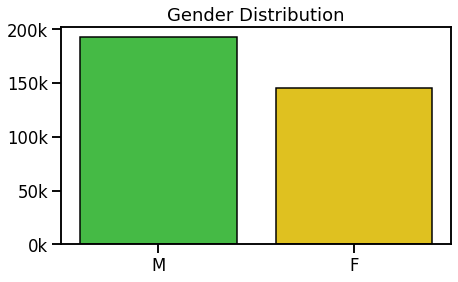

In [368]:
plt.figure(figsize=(7,4))
g = sns.countplot(
    x ='gender',
    data = df,
    edgecolor='black',
    palette={"F": "gold", "M": "limegreen"}
)
ylabels = ['{:,.0f}'.format(y) + 'k' for y in g.get_yticks()/1000]
g.set_yticklabels(ylabels)
g.set_title('Gender Distribution')
g.set_xlabel('')
g.set_ylabel('')
plt.show()

In [619]:
%run EDA_plots.py

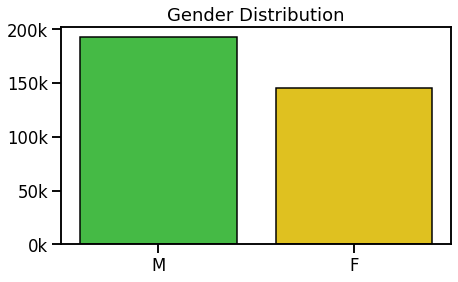

In [620]:
gender_distribution(df)

---
## Age Distribution

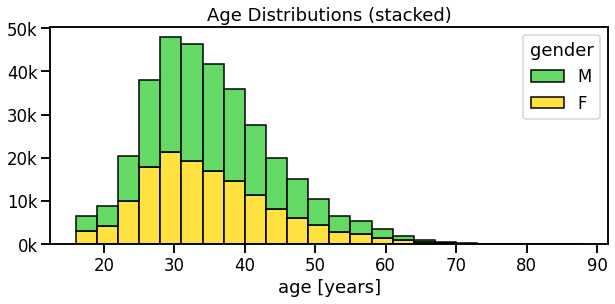

In [379]:
plt.figure(figsize=(10,4))
g = sns.histplot(
    data=df,
    x='age',
    hue='gender',
    bins=24,
    multiple='stack',
    edgecolor='black',
    palette={"F": "gold", "M": "limegreen"}
)
g.set_title('Age Distributions (stacked)')
g.set_ylabel('')
ylabels = ['{:,.0f}'.format(y) + 'k' for y in g.get_yticks()/1000]
g.set_yticklabels(ylabels)
g.set_xlabel('age [years]')
plt.show()

---
## Workout Participations

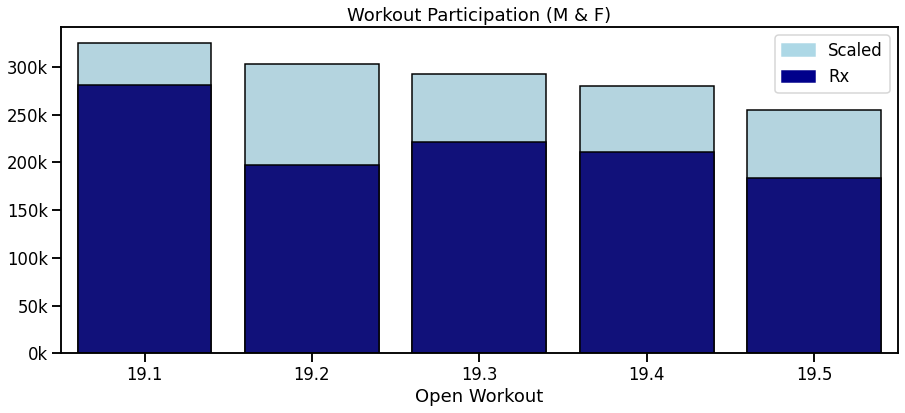

In [395]:
rx,sc = [],[]
for i in [1,2,3,4,5]:
    rx.append(df[(df[f'scaled_{i}']==0) & (df[f'score_{i}']!=0)]['competitorid'].count())
    sc.append(df[(df[f'scaled_{i}']==1) & (df[f'score_{i}']!=0)]['competitorid'].count())
tot = np.add(rx,sc)

plt.figure(figsize=(15,6))
idx = ['19.1','19.2','19.3','19.4','19.5']
bar1 = sns.barplot(
    x=idx,
    y=tot,
    color='lightblue',
    edgecolor='black'
)
bar2 = sns.barplot(
    x=idx,
    y=rx,
    color='darkblue',
    edgecolor='black'
)
bar1.set_title('Workout Participation (M & F)')
ylabels = ['{:,.0f}'.format(y) + 'k' for y in bar1.get_yticks()/1000]
bar1.set_yticklabels(ylabels)
bar1.set_xlabel('Open Workout')
top_bar = mpatches.Patch(color='lightblue', label='Scaled')
bottom_bar = mpatches.Patch(color='darkblue', label='Rx')
top_bar
plt.legend(handles=[top_bar, bottom_bar])
plt.show()

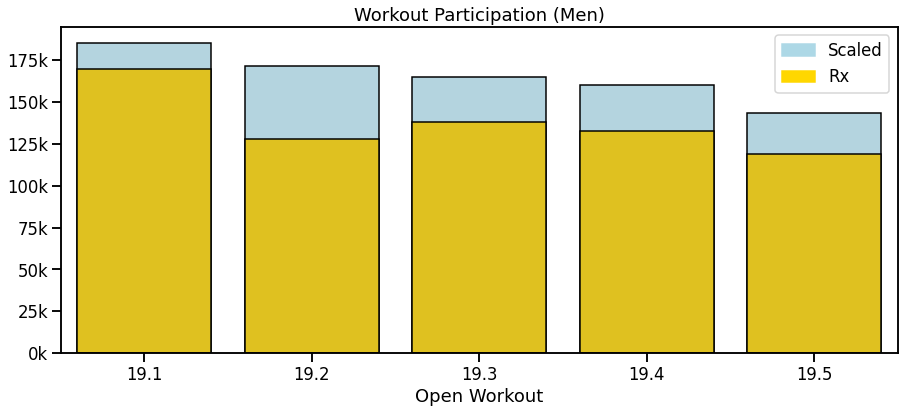

In [398]:
rx,sc = [],[]
df_m = df[df['gender']=='M']
for i in [1,2,3,4,5]:
    rx.append(df_m[(df_m[f'scaled_{i}']==0) & (df_m[f'score_{i}']!=0)]['competitorid'].count())
    sc.append(df_m[(df_m[f'scaled_{i}']==1) & (df_m[f'score_{i}']!=0)]['competitorid'].count())
tot = np.add(rx,sc)

plt.figure(figsize=(15,6))
idx = ['19.1','19.2','19.3','19.4','19.5']
bar1 = sns.barplot(
    x=idx,
    y=tot,
    color='lightblue',
    edgecolor='black'
)
bar2 = sns.barplot(
    x=idx,
    y=rx,
    color='gold',
    edgecolor='black'
)
bar1.set_title('Workout Participation (Men)')
ylabels = ['{:,.0f}'.format(y) + 'k' for y in bar1.get_yticks()/1000]
bar1.set_yticklabels(ylabels)
bar1.set_xlabel('Open Workout')
top_bar = mpatches.Patch(color='lightblue', label='Scaled')
bottom_bar = mpatches.Patch(color='gold', label='Rx')
plt.legend(handles=[top_bar, bottom_bar])
plt.show()

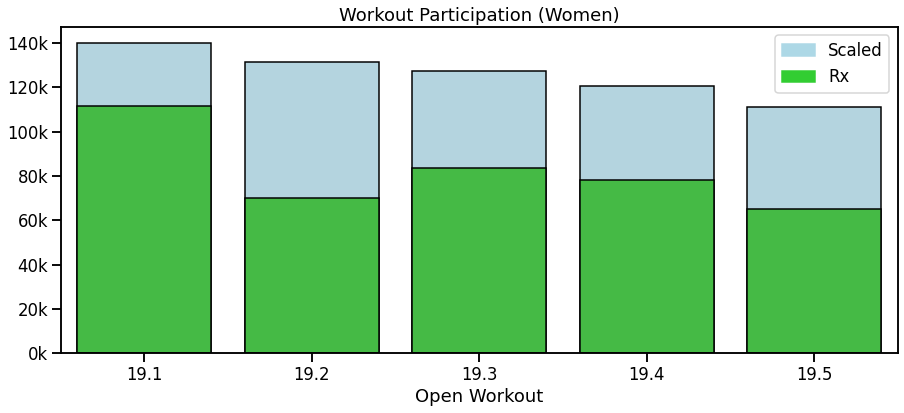

In [399]:
rx,sc = [],[]
df_f = df[df['gender']=='F']
for i in [1,2,3,4,5]:
    rx.append(df_f[(df_f[f'scaled_{i}']==0) & (df_f[f'score_{i}']!=0)]['competitorid'].count())
    sc.append(df_f[(df_f[f'scaled_{i}']==1) & (df_f[f'score_{i}']!=0)]['competitorid'].count())
tot = np.add(rx,sc)

plt.figure(figsize=(15,6))
idx = ['19.1','19.2','19.3','19.4','19.5']
bar1 = sns.barplot(
    x=idx,
    y=tot,
    color='lightblue',
    edgecolor='black'
)
bar2 = sns.barplot(
    x=idx,
    y=rx,
    color='limegreen',
    edgecolor='black'
)
bar1.set_title('Workout Participation (Women)')
ylabels = ['{:,.0f}'.format(y) + 'k' for y in bar1.get_yticks()/1000]
bar1.set_yticklabels(ylabels)
bar1.set_xlabel('Open Workout')
top_bar = mpatches.Patch(color='lightblue', label='Scaled')
bottom_bar = mpatches.Patch(color='limegreen', label='Rx')
plt.legend(handles=[top_bar, bottom_bar])
plt.show()

---

In [10]:
df[(df['division']=='Men') | (df['division']=='Women')]['competitorid'].count()

325632

In [11]:
# 12,906 (about 4% of competitors) do not participate in Men/Women division
# and only in another division

---

## Preparations

In [12]:
# create new feature: w2_full_rounds_completed
w2_full_rounds_completed_list = df['w2_rounds_completed'].to_list()
w2_full_rounds_completed = []
for i in w2_full_rounds_completed_list:
    if i < 2.0:
        w2_full_rounds_completed.append('<  8 min')
    elif i >= 2.0 and i < 3.0:
        w2_full_rounds_completed.append('< 12 min')
    elif i >= 3.0 and i < 4.0:
        w2_full_rounds_completed.append('< 16 min')
    elif i >= 4.0 and i < 5.0:
        w2_full_rounds_completed.append('< 20 min')
    elif i == 5.0:
        w2_full_rounds_completed.append('full WOD')
    else:
        w2_full_rounds_completed.append(np.NaN)
df['w2_full_rounds_completed'] = w2_full_rounds_completed

In [13]:
# create new feature: w3_full_rounds_completed
w3_full_rounds_completed_list = df['w3_rounds_completed'].to_list()
w3_full_rounds_completed = []
for i in w3_full_rounds_completed_list:
    if i < 1.0:
        w3_full_rounds_completed.append('OHL')
    elif i >= 1.0 and i < 2.0:
        w3_full_rounds_completed.append('Box SU')
    elif i >= 2.0 and i < 3.0:
        w3_full_rounds_completed.append('HSPU')
    elif i >= 3.0 and i < 4.0:
        w3_full_rounds_completed.append('HS-Walk')
    elif i == 4.0:
        w3_full_rounds_completed.append('full WOD')
    else:
        w3_full_rounds_completed.append(np.NaN)
df['w3_full_rounds_completed'] = w3_full_rounds_completed

In [14]:
#sns.set_style('white')
sns.set_context("talk")

In [15]:
# get the overallrank rank range for top 1% of athletes
df_ta = df[(df['division']=='Men')|(df['division']=='Women')]
ta_1 = int(0.01*df_ta.overallrank.max())
df_ta = df_ta[df_ta['overallrank']<=ta_1]

---

## Workout Balance

### 19.1

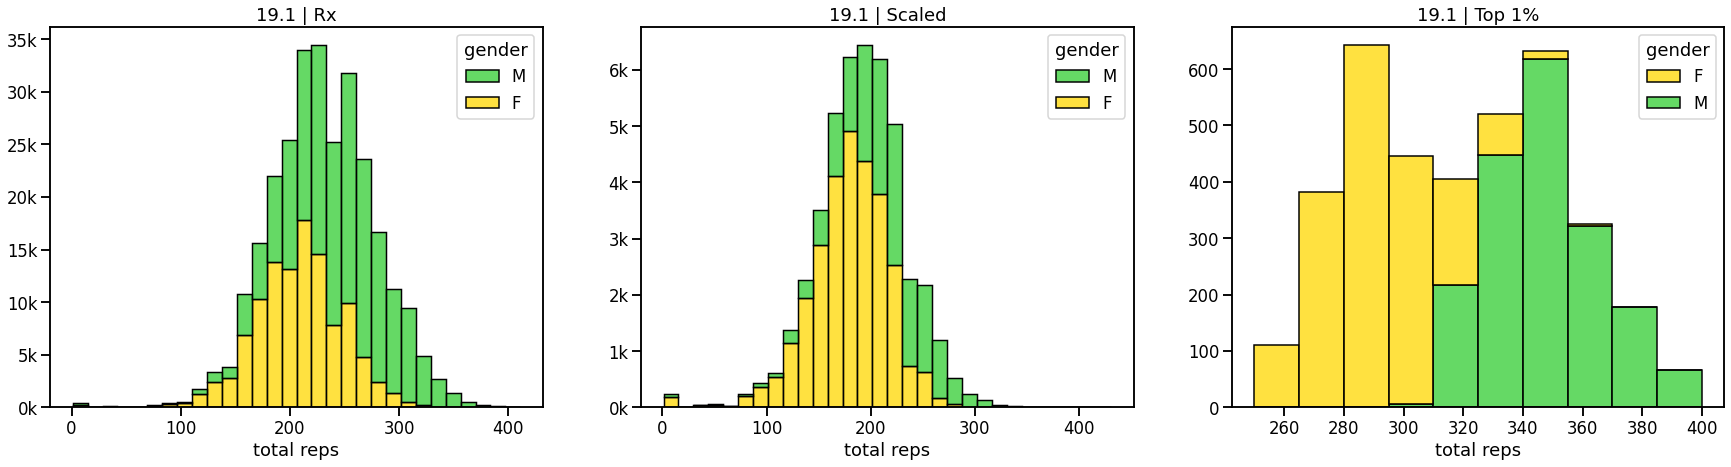

In [411]:
fig, axes = plt.subplots(1, 3, figsize=(30, 7))

a = sns.histplot(
    ax=axes[0],
    data=df[df['scaled_1']==0],
    x='w1_reps_total',
    hue='gender',
    bins=30,
    multiple='stack',
    edgecolor='black',
    palette={"F": "gold", "M": "limegreen"}
)
a.set_title('19.1 | Rx')
a.set_ylabel('')
a.set_xlabel('total reps')
ylabels = ['{:,.0f}'.format(y) + 'k' for y in a.get_yticks()/1000]
a.set_yticklabels(ylabels)

b = sns.histplot(
    ax=axes[1],
    data=df[df['scaled_1']==1],
    x='w1_reps_total',
    hue='gender',
    bins=30,
    multiple='stack',
    edgecolor='black',
    palette={"F": "gold", "M": "limegreen"}
)
b.set_title('19.1 | Scaled')
b.set_ylabel('')
b.set_xlabel('total reps')
ylabels = ['{:,.0f}'.format(y) + 'k' for y in b.get_yticks()/1000]
b.set_yticklabels(ylabels)

c = sns.histplot(
    ax=axes[2],
    data=df_ta,
    x='w1_reps_total',
    hue='gender',
    bins=10,
    multiple='stack',
    edgecolor='black',
    palette={"F": "gold", "M": "limegreen"}
)
c.set_title('19.1 | Top 1%')
c.set_ylabel('')
c.set_xlabel('total reps');

---
### 19.2

In [17]:
fig = go.Figure()

df_m_rx = df[(df['gender']=='M') & (df['scaled_2']==0) & (df['score_2']!=0)].groupby(by='w2_full_rounds_completed').count()
df_m_rx_list = list(df_m_rx.competitorid)
fig.add_trace(go.Funnel(
    name = 'Men',
    y = ['start', ' 8 min', '12 min', '16 min', '20 min'],
    x = [
        sum(df_m_rx_list),
        sum(df_m_rx_list)-sum(df_m_rx_list[:1]),
        sum(df_m_rx_list)-sum(df_m_rx_list[:2]),
        sum(df_m_rx_list)-sum(df_m_rx_list[:3]),
        sum(df_m_rx_list)-sum(df_m_rx_list[:4])
    ],
    textinfo = "value+percent initial",
    marker = {"color": "#86CE00"}))

df_f_rx = df[(df['gender']=='F') & (df['scaled_2']==0) & (df['score_2']!=0)].groupby(by='w2_full_rounds_completed').count()
df_f_rx_list = list(df_f_rx.competitorid)
fig.add_trace(go.Funnel(
    name = 'Women',
    y = ['start', ' 8 min', '12 min', '16 min', '20 min'],
    x = [
        sum(df_f_rx_list),
        sum(df_f_rx_list)-sum(df_f_rx_list[:1]),
        sum(df_f_rx_list)-sum(df_f_rx_list[:2]),
        sum(df_f_rx_list)-sum(df_f_rx_list[:3]),
        sum(df_f_rx_list)-sum(df_f_rx_list[:4])
    ],
    textinfo = "value+percent initial",
    marker = {"color": "#FBE426"}))

fig.show()

In [18]:
fig = go.Figure()

df_m_sc = df[(df['gender']=='M') & (df['scaled_2']==1) & (df['score_2']!=0)].groupby(by='w2_full_rounds_completed').count()
df_m_sc_list = list(df_m_sc.competitorid)
fig.add_trace(go.Funnel(
    name = 'Men',
    y = ['start', ' 8 min', '12 min', '16 min', '20 min'],
    x = [
        sum(df_m_sc_list),
        sum(df_m_sc_list)-sum(df_m_sc_list[:1]),
        sum(df_m_sc_list)-sum(df_m_sc_list[:2]),
        sum(df_m_sc_list)-sum(df_m_sc_list[:3]),
        sum(df_m_sc_list)-sum(df_m_sc_list[:4])
    ],
    textinfo = "value+percent initial",
    marker = {"color": "#86CE00"}))

df_f_sc = df[(df['gender']=='F') & (df['scaled_2']==1) & (df['score_2']!=0)].groupby(by='w2_full_rounds_completed').count()
df_f_sc_list = list(df_f_sc.competitorid)
fig.add_trace(go.Funnel(
    name = 'Women',
    y = ['start', ' 8 min', '12 min', '16 min', '20 min'],
    x = [
        sum(df_f_sc_list),
        sum(df_f_sc_list)-sum(df_f_sc_list[:1]),
        sum(df_f_sc_list)-sum(df_f_sc_list[:2]),
        sum(df_f_sc_list)-sum(df_f_sc_list[:3]),
        sum(df_f_sc_list)-sum(df_f_sc_list[:4])
    ],
    textinfo = "value+percent initial",
    marker = {"color": "#FBE426"}))

fig.show()

In [19]:
fig = go.Figure()

df_m_1 = df_ta[df_ta['gender']=='M'].groupby(by='w2_full_rounds_completed').count()
df_m_1_list = list(df_m_1.competitorid)
fig.add_trace(go.Funnel(
    name = 'Men',
    y = ['start', ' 8 min', '12 min', '16 min', '20 min'],
    x = [
        sum(df_m_1_list),
        sum(df_m_1_list)-sum(df_m_1_list[:1]),
        sum(df_m_1_list)-sum(df_m_1_list[:2]),
        sum(df_m_1_list)-sum(df_m_1_list[:3]),
        sum(df_m_1_list)-sum(df_m_1_list[:4])
    ],
    textinfo = "value+percent initial",
    marker = {"color": "#86CE00"}))

df_f_1 = df_ta[df_ta['gender']=='F'].groupby(by='w2_full_rounds_completed').count()
df_f_1_list = list(df_f_1.competitorid)
fig.add_trace(go.Funnel(
    name = 'Women',
    y = ['start', ' 8 min', '12 min', '16 min', '20 min'],
    x = [
        sum(df_f_1_list),
        sum(df_f_1_list)-sum(df_f_1_list[:1]),
        sum(df_f_1_list)-sum(df_f_1_list[:2]),
        sum(df_f_1_list)-sum(df_f_1_list[:3]),
        sum(df_f_1_list)-sum(df_f_1_list[:4])
    ],
    textinfo = "value+percent initial",
    marker = {"color": "#FBE426"}))

fig.show()

---
### 19.3

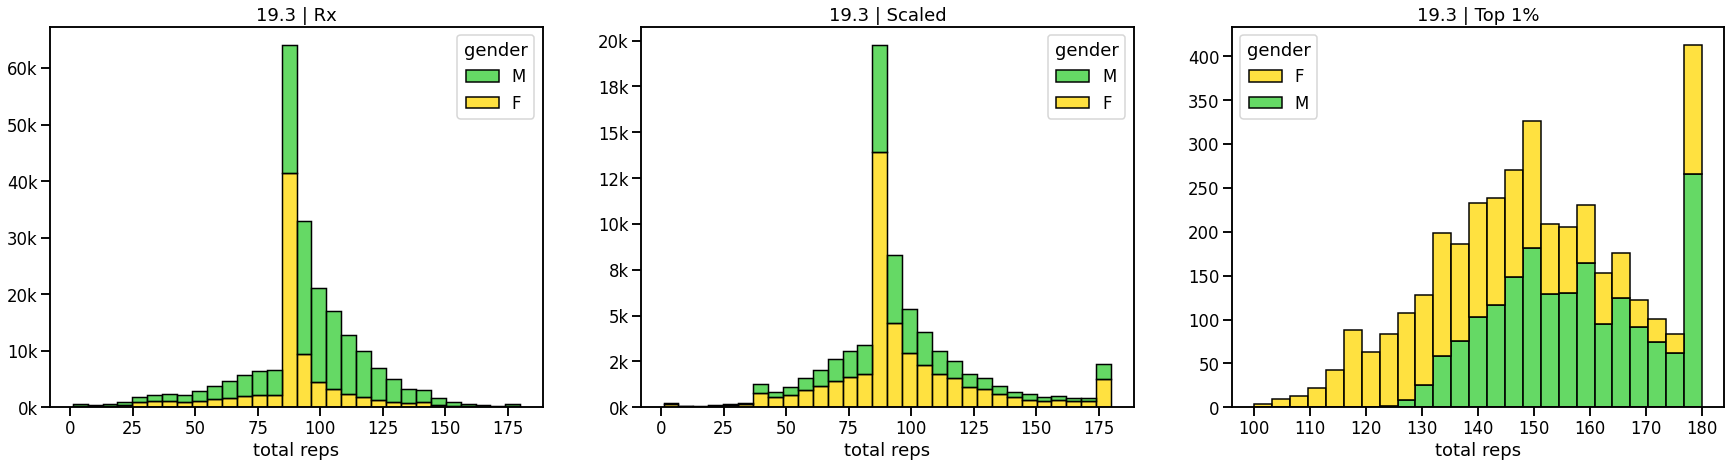

In [413]:
fig, axes = plt.subplots(1, 3, figsize=(30, 7))

a=sns.histplot(
    ax=axes[0],
    data=df[df['scaled_3']==0],
    x='w3_reps_total',
    hue='gender',
    bins=30,
    multiple='stack',
    edgecolor='black',
    palette={"F": "gold", "M": "limegreen"}
)
a.set_title('19.3 | Rx')
a.set_ylabel('')
a.set_xlabel('total reps')
ylabels = ['{:,.0f}'.format(y) + 'k' for y in a.get_yticks()/1000]
a.set_yticklabels(ylabels)

b=sns.histplot(
    ax=axes[1],
    data=df[df['scaled_3']==1],
    x='w3_reps_total',
    hue='gender',
    bins=30,
    multiple='stack',
    edgecolor='black',
    palette={"F": "gold", "M": "limegreen"}
)
b.set_title('19.3 | Scaled')
b.set_ylabel('')
b.set_xlabel('total reps')
ylabels = ['{:,.0f}'.format(y) + 'k' for y in b.get_yticks()/1000]
b.set_yticklabels(ylabels)

c=sns.histplot(
    ax=axes[2],
    data=df_ta,
    x='w3_reps_total',
    hue='gender',
    bins=25,
    multiple='stack',
    edgecolor='black',
    palette={"F": "gold", "M": "limegreen"}
)
c.set_title('19.3 | Top 1%')
c.set_ylabel('')
c.set_xlabel('total reps');

In [21]:
fig = go.Figure()

df_m_rx = df[(df['gender']=='M') & (df['scaled_3']==0) & (df['score_3']!=0)].groupby(by='w3_full_rounds_completed').count()
df_m_rx_list = list(df_m_rx.competitorid)
fig.add_trace(go.Funnel(
    name = 'Men',
    y = ['start', 'OHL', 'Box SU', 'HSPU', 'HS-Walk'],
    x = [
        sum(df_m_rx_list),
        sum(df_m_rx_list)-sum(df_m_rx_list[:1]),
        sum(df_m_rx_list)-sum(df_m_rx_list[:2]),
        sum(df_m_rx_list)-sum(df_m_rx_list[:3]),
        sum(df_m_rx_list)-sum(df_m_rx_list[:4])
    ],
    textinfo = "value+percent initial",
    marker = {"color": "#86CE00"}))

df_f_rx = df[(df['gender']=='F') & (df['scaled_3']==0) & (df['score_3']!=0)].groupby(by='w3_full_rounds_completed').count()
df_f_rx_list = list(df_f_rx.competitorid)
fig.add_trace(go.Funnel(
    name = 'Women',
    y = ['start', 'OHL', 'Box SU', 'HSPU', 'HS-Walk'],
    x = [
        sum(df_f_rx_list),
        sum(df_f_rx_list)-sum(df_f_rx_list[:1]),
        sum(df_f_rx_list)-sum(df_f_rx_list[:2]),
        sum(df_f_rx_list)-sum(df_f_rx_list[:3]),
        sum(df_f_rx_list)-sum(df_f_rx_list[:4])
    ],
    textinfo = "value+percent initial",
    marker = {"color": "#FBE426"}))

fig.show()

In [22]:
fig = go.Figure()

df_m_sc = df[(df['gender']=='M') & (df['scaled_3']==1) & (df['score_3']!=0)].groupby(by='w3_full_rounds_completed').count()
df_m_sc_list = list(df_m_sc.competitorid)
fig.add_trace(go.Funnel(
    name = 'Men',
    y = ['start', 'OHL', 'Box SU', 'HSPU', 'HS-Walk'],
    x = [
        sum(df_m_sc_list),
        sum(df_m_sc_list)-sum(df_m_sc_list[:1]),
        sum(df_m_sc_list)-sum(df_m_sc_list[:2]),
        sum(df_m_sc_list)-sum(df_m_sc_list[:3]),
        sum(df_m_sc_list)-sum(df_m_sc_list[:4])
    ],
    textinfo = "value+percent initial",
    marker = {"color": "#86CE00"}))

df_f_sc = df[(df['gender']=='F') & (df['scaled_2']==1) & (df['score_3']!=0)].groupby(by='w3_full_rounds_completed').count()
df_f_sc_list = list(df_f_sc.competitorid)
fig.add_trace(go.Funnel(
    name = 'Women',
    y = ['start', 'OHL', 'Box SU', 'HSPU', 'HS-Walk'],
    x = [
        sum(df_f_sc_list),
        sum(df_f_sc_list)-sum(df_f_sc_list[:1]),
        sum(df_f_sc_list)-sum(df_f_sc_list[:2]),
        sum(df_f_sc_list)-sum(df_f_sc_list[:3]),
        sum(df_f_sc_list)-sum(df_f_sc_list[:4])
    ],
    textinfo = "value+percent initial",
    marker = {"color": "#FBE426"}))

fig.show()

In [23]:
fig = go.Figure()

df_m_1 = df_ta[df_ta['gender']=='M'].groupby(by='w3_full_rounds_completed').count()
df_m_1_list = list(df_m_1.competitorid)
fig.add_trace(go.Funnel(
    name = 'Men',
    y = ['Box SU', 'HSPU', 'HS-Walk'],
    x = [
        sum(df_m_1_list),
        sum(df_m_1_list)-sum(df_m_1_list[:1]),
        sum(df_m_1_list)-sum(df_m_1_list[:2]),
        sum(df_m_1_list)-sum(df_m_1_list[:3]),
        sum(df_m_1_list)-sum(df_m_1_list[:4])
    ],
    textinfo = "value+percent initial",
    marker = {"color": "#86CE00"}))

df_f_1 = df_ta[df_ta['gender']=='F'].groupby(by='w3_full_rounds_completed').count()
df_f_1_list = list(df_f_1.competitorid)
fig.add_trace(go.Funnel(
    name = 'Women',
    y = ['Box SU', 'HSPU', 'HS-Walk'],
    x = [
        sum(df_f_1_list),
        sum(df_f_1_list)-sum(df_f_1_list[:1]),
        sum(df_f_1_list)-sum(df_f_1_list[:2]),
        sum(df_f_1_list)-sum(df_f_1_list[:3]),
        sum(df_f_1_list)-sum(df_f_1_list[:4])
    ],
    textinfo = "value+percent initial",
    marker = {"color": "#FBE426"}))

fig.show()

---
### 19.4

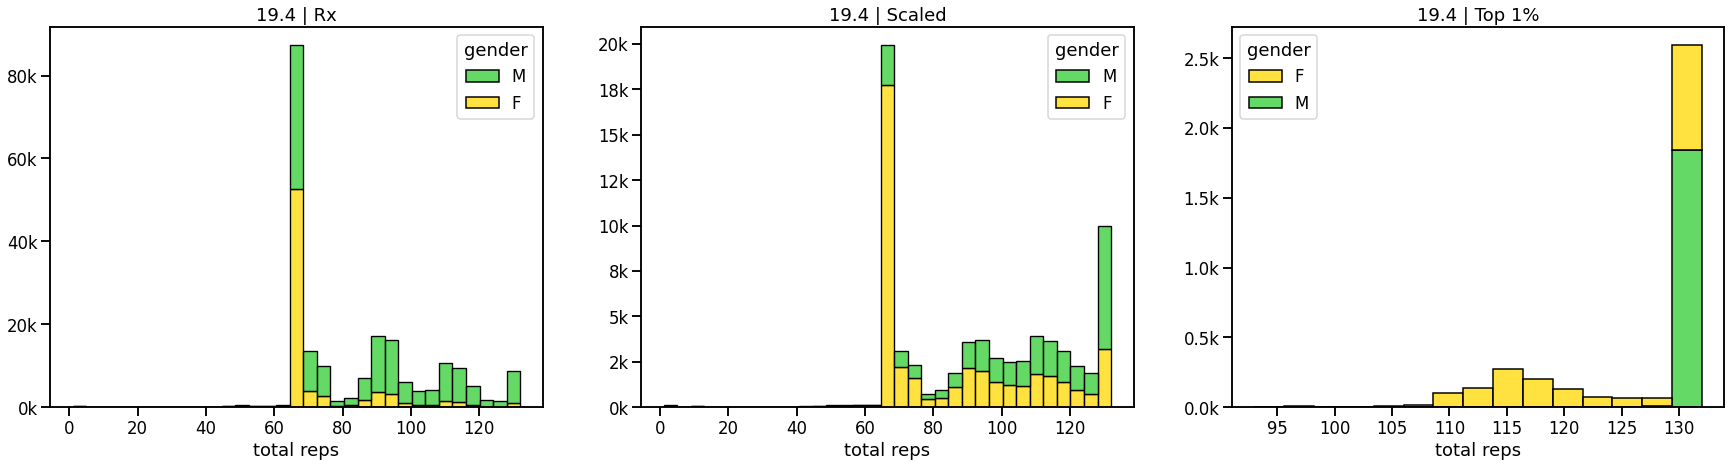

In [416]:
fig, axes = plt.subplots(1, 3, figsize=(30, 7))

a = sns.histplot(
    ax=axes[0],
    data=df[df['scaled_4']==0],
    x='w4_reps_total',
    hue='gender',
    bins=33,
    multiple='stack',
    palette={"F": "gold", "M": "limegreen"}
)
a.set_title('19.4 | Rx')
a.set_ylabel('')
a.set_xlabel('total reps')
ylabels = ['{:,.0f}'.format(y) + 'k' for y in a.get_yticks()/1000]
a.set_yticklabels(ylabels)

b = sns.histplot(
    ax=axes[1],
    data=df[df['scaled_4']==1],
    x='w4_reps_total',
    hue='gender',
    bins=33,
    multiple='stack',
    palette={"F": "gold", "M": "limegreen"}
)
b.set_title('19.4 | Scaled')
b.set_ylabel('')
b.set_xlabel('total reps')
ylabels = ['{:,.0f}'.format(y) + 'k' for y in b.get_yticks()/1000]
b.set_yticklabels(ylabels)

c = sns.histplot(
    ax=axes[2],
    data=df_ta,
    x='w4_reps_total',
    hue='gender',
    bins=15,
    multiple='stack',
    palette={"F": "gold", "M": "limegreen"}
)
c.set_title('19.4 | Top 1%')
c.set_ylabel('')
c.set_xlabel('total reps')
ylabels = ['{:,.1f}'.format(y) + 'k' for y in c.get_yticks()/1000]
c.set_yticklabels(ylabels);

---
### 19.5

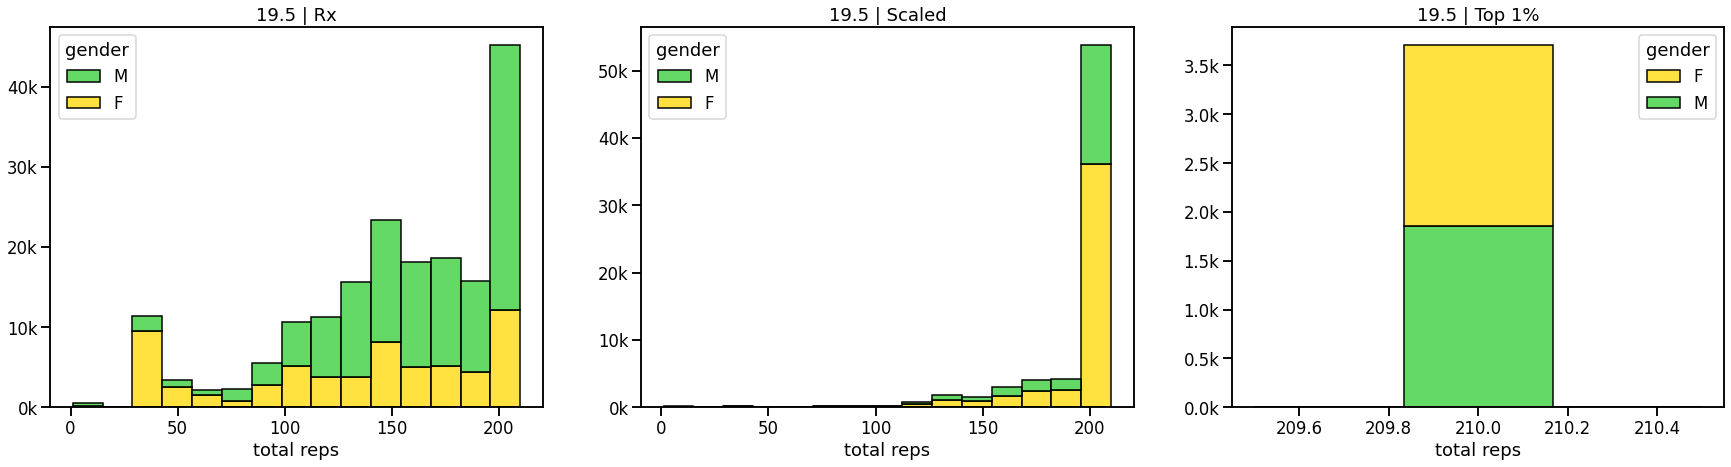

In [418]:
fig, axes = plt.subplots(1, 3, figsize=(30, 7))

a = sns.histplot(
    ax=axes[0],
    data=df[df['scaled_5']==0],
    x='w5_reps_total',
    hue='gender',
    bins=15,
    multiple='stack',
    palette={"F": "gold", "M": "limegreen"}
)
a.set_title('19.5 | Rx')
a.set_ylabel('')
a.set_xlabel('total reps')
ylabels = ['{:,.0f}'.format(y) + 'k' for y in a.get_yticks()/1000]
a.set_yticklabels(ylabels)

b = sns.histplot(
    ax=axes[1],
    data=df[df['scaled_5']==1],
    x='w5_reps_total',
    hue='gender',
    bins=15,
    multiple='stack',
    palette={"F": "gold", "M": "limegreen"}
)
b.set_title('19.5 | Scaled')
b.set_ylabel('')
b.set_xlabel('total reps')
ylabels = ['{:,.0f}'.format(y) + 'k' for y in b.get_yticks()/1000]
b.set_yticklabels(ylabels)

c = sns.histplot(
    ax=axes[2],
    data=df_ta,
    x='w5_reps_total',
    hue='gender',
    bins=3,
    multiple='stack',
    palette={"F": "gold", "M": "limegreen"}
)
c.set_title('19.5 | Top 1%')
c.set_ylabel('')
c.set_xlabel('total reps')
ylabels = ['{:,.1f}'.format(y) + 'k' for y in c.get_yticks()/1000]
c.set_yticklabels(ylabels);

---
## Important Exercises

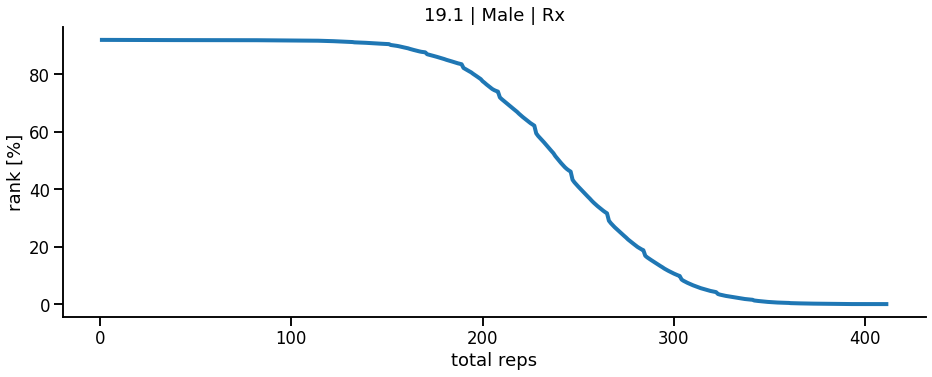

In [419]:
df_m = df[(df['division']=='Men')&(df['scaled_1']==0)]
max_m = (df_m['rank_1'].max())/100
a_m=list(df_m.groupby(by='w1_reps_total')['rank_1'].mean())
a_m=np.divide(a_m,max_m)
b_m=list(df_m.groupby(by='w1_reps_total')['w1_reps_total'])
c_m=[]
for i in b_m:
    c_m.append(i[0])
g=sns.relplot(x=c_m, y=a_m, kind="line",linewidth=4)
g.fig.set_size_inches(15,5)
g.set(xlabel='total reps', ylabel='rank [%]', title= '19.1 | Male | Rx');

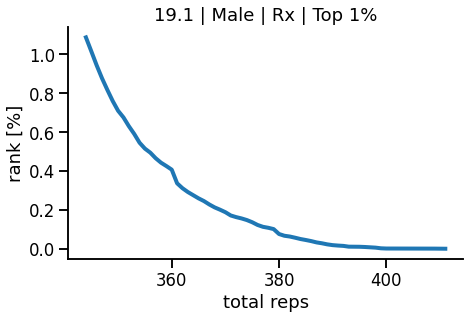

In [420]:
last=58
g=sns.relplot(x=c_m[-last:], y=a_m[-last:], kind="line",linewidth=4)
g.fig.set_size_inches(15,5)
g.set(
    xlabel='total reps',
    ylabel='rank [%]',
    title= '19.1 | Male | Rx | Top 1%')
g.fig.set_figheight(4)
g.fig.set_figwidth(7)

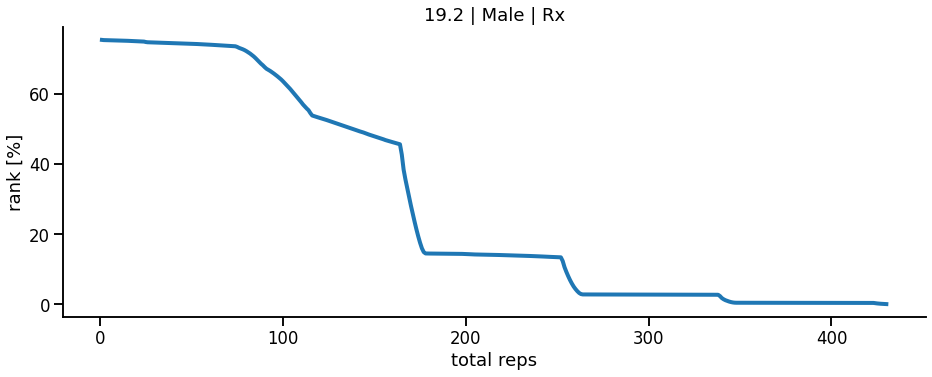

In [421]:
df_m = df[(df['division']=='Men')&(df['scaled_2']==0)]
max_m = (df_m['rank_2'].max())/100
a_m=list(df_m.groupby(by='w2_reps_total')['rank_2'].mean())
a_m=np.divide(a_m,max_m)
b_m=list(df_m.groupby(by='w2_reps_total')['w2_reps_total'])
c_m=[]
for i in b_m:
    c_m.append(i[0])
g=sns.relplot(x=c_m, y=a_m, kind="line",linewidth=4)
g.fig.set_size_inches(15,5)
g.set(xlabel='total reps', ylabel='rank [%]', title= '19.2 | Male | Rx');

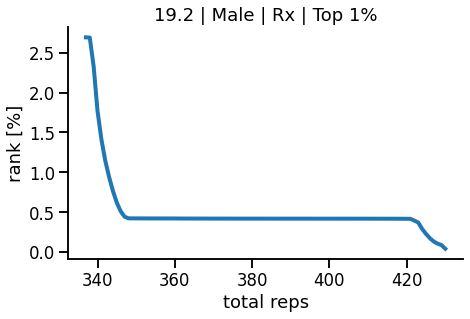

In [422]:
last=30
g=sns.relplot(x=c_m[-last:], y=a_m[-last:], kind="line",linewidth=4)
g.fig.set_size_inches(15,5)
g.set(
    xlabel='total reps',
    ylabel='rank [%]',
    title= '19.2 | Male | Rx | Top 1%')
g.fig.set_figheight(4)
g.fig.set_figwidth(7)

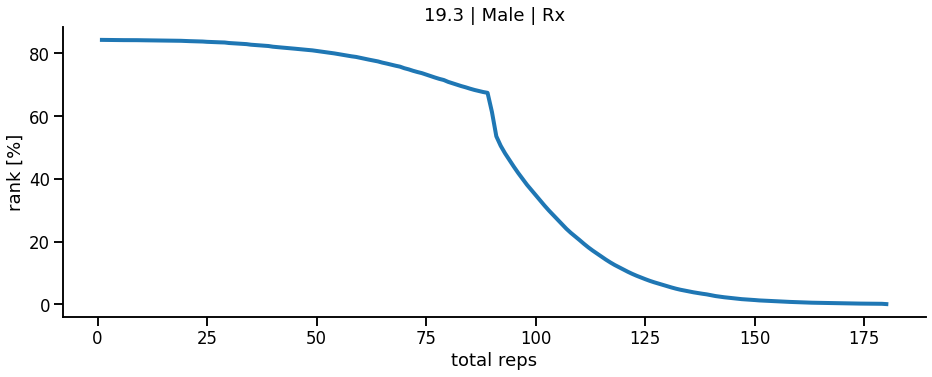

In [423]:
df_m = df[(df['division']=='Men')&(df['scaled_3']==0)]
max_m = (df_m['rank_3'].max())/100
a_m=list(df_m.groupby(by='w3_reps_total')['rank_3'].mean())
a_m=np.divide(a_m,max_m)
b_m=list(df_m.groupby(by='w3_reps_total')['w3_reps_total'])
c_m=[]
for i in b_m:
    c_m.append(i[0])
g=sns.relplot(x=c_m, y=a_m, kind="line",linewidth=4)
g.fig.set_size_inches(15,5)
g.set(xlabel='total reps', ylabel='rank [%]', title= '19.3 | Male | Rx');

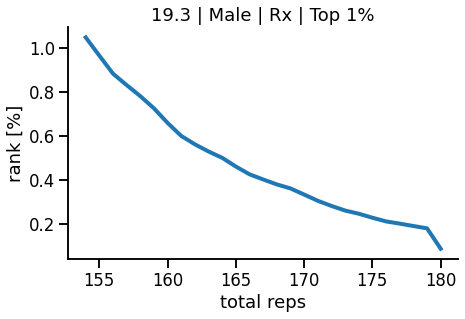

In [424]:
last=27
g=sns.relplot(x=c_m[-last:], y=a_m[-last:], kind="line",linewidth=4)
g.fig.set_size_inches(15,5)
g.set(
    xlabel='total reps',
    ylabel='rank [%]',
    title= '19.3 | Male | Rx | Top 1%')
g.fig.set_figheight(4)
g.fig.set_figwidth(7)

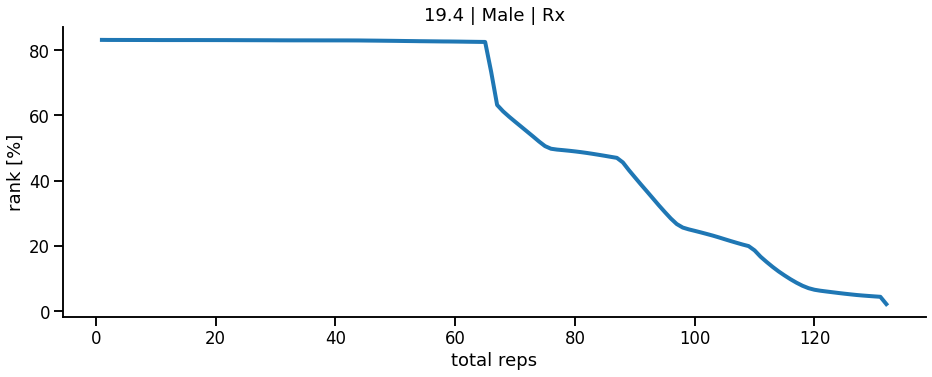

In [425]:
df_m = df[(df['division']=='Men')&(df['scaled_4']==0)]
max_m = (df_m['rank_4'].max())/100
a_m=list(df_m.groupby(by='w4_reps_total')['rank_4'].mean())
a_m=np.divide(a_m,max_m)
b_m=list(df_m.groupby(by='w4_reps_total')['w4_reps_total'])
c_m=[]
for i in b_m:
    c_m.append(i[0])
g=sns.relplot(x=c_m, y=a_m, kind="line",linewidth=4)
g.fig.set_size_inches(15,5)
g.set(xlabel='total reps', ylabel='rank [%]', title= '19.4 | Male | Rx');

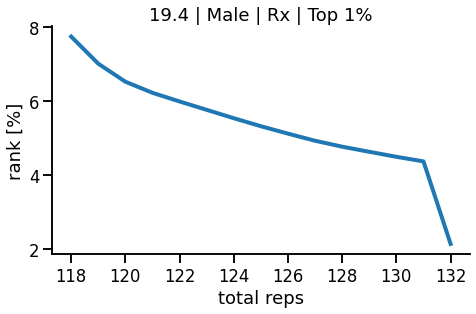

In [426]:
last=15
g=sns.relplot(x=c_m[-last:], y=a_m[-last:], kind="line",linewidth=4)
g.fig.set_size_inches(15,5)
g.set(
    xlabel='total reps',
    ylabel='rank [%]',
    title= '19.4 | Male | Rx | Top 1%')
g.fig.set_figheight(4)
g.fig.set_figwidth(7)

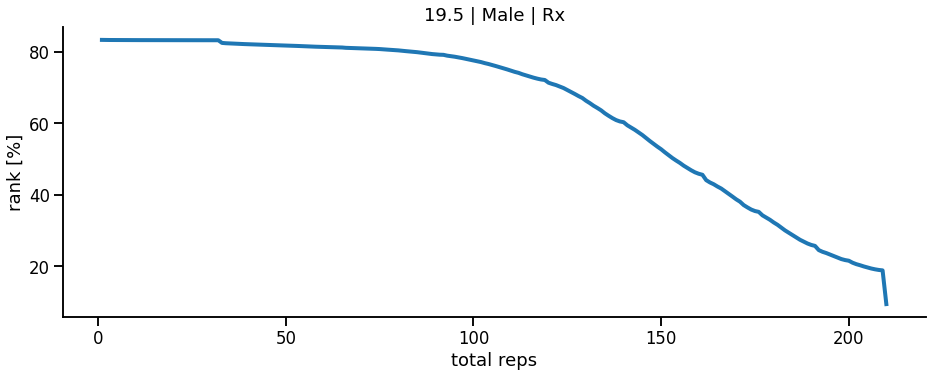

In [427]:
df_m = df[(df['division']=='Men')&(df['scaled_5']==0)]
max_m = (df_m['rank_5'].max())/100
a_m=list(df_m.groupby(by='w5_reps_total')['rank_5'].mean())
a_m=np.divide(a_m,max_m)
b_m=list(df_m.groupby(by='w5_reps_total')['w5_reps_total'])
c_m=[]
for i in b_m:
    c_m.append(i[0])
g=sns.relplot(x=c_m, y=a_m, kind="line",linewidth=4)
g.fig.set_size_inches(15,5)
g.set(xlabel='total reps', ylabel='rank [%]', title= '19.5 | Male | Rx');

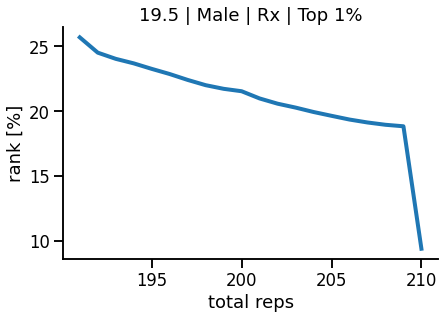

In [428]:
last=20
g=sns.relplot(x=c_m[-last:], y=a_m[-last:], kind="line",linewidth=4)
g.fig.set_size_inches(15,5)
g.set(
    xlabel='total reps',
    ylabel='rank [%]',
    title= '19.5 | Male | Rx | Top 1%')
g.fig.set_figheight(4)
g.fig.set_figwidth(7)

---
## Regional Performance

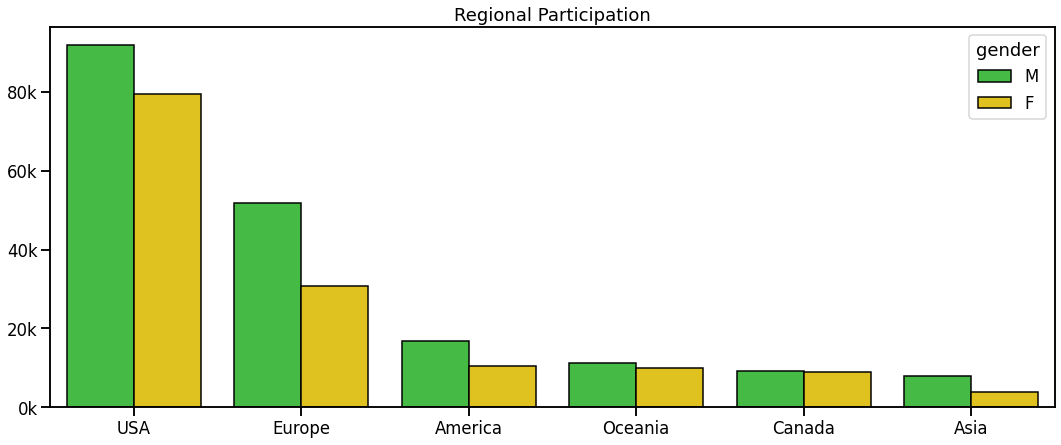

In [430]:
plt.figure(figsize=(18,7))
g = sns.countplot(
    data=df,
    x='region',
    hue='gender',
    order=df.region.value_counts().iloc[:6].index,
    edgecolor='black',
    palette={"F": "gold", "M": "limegreen"}
)
g.set_ylabel('')
g.set_xlabel('')
g.set_title('Regional Participation')
ylabels = ['{:,.0f}'.format(y) + 'k' for y in g.get_yticks()/1000]
g.set_yticklabels(ylabels)
plt.show()

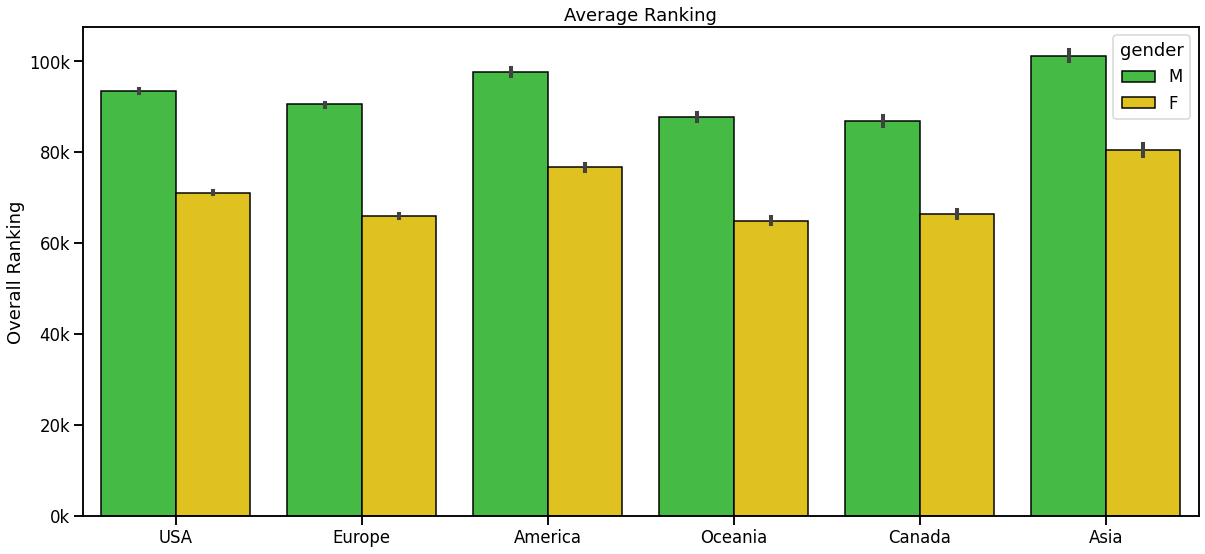

In [481]:
plt.figure(figsize=(20,9))
g = sns.barplot(
    data=df[(df['division']=='Men')|(df['division']=='Women')],
    x='region',
    y='overallrank',
    hue='gender',
    order=df.region.value_counts().iloc[:6].index,
    edgecolor='black',
    palette={"F": "gold", "M": "limegreen"}
)
g.set_title('Average Ranking')
g.set_xlabel('')
g.set_ylabel('Overall Ranking')
ylabels = ['{:,.0f}'.format(y) + 'k' for y in g.get_yticks()/1000]
g.set_yticklabels(ylabels)
plt.show()

In [437]:
countries = ['United States', 'Bahamas', 'New Zealand', 'Canada',
       'Russian Federation', 'Kenya', 'Australia', 'Costa Rica',
       'Denmark', 'United Kingdom', 'Sweden', 'Netherlands', 'France',
       'Ireland', 'Switzerland', 'South Africa', 'Germany', 'Argentina',
       'Italy', 'Norway', 'Iceland', 'Zimbabwe', 'Peru', 'Portugal',
       'Korea, Republic of', 'Philippines', 'Colombia', 'Mexico',
       'Singapore', 'Chile', 'Israel', 'Brazil', 'Ukraine', 'Spain',
       'Ecuador', 'United Arab Emirates', 'Slovenia', 'Turkey', 'China',
       'Jamaica', 'Bahrain', 'Czech Republic', 'Malaysia', 'Egypt',
       'Hungary', 'Indonesia', 'Finland', 'Angola', 'Tonga',
       'Trinidad and Tobago', 'Belgium', 'Brunei Darussalam',
       'Afghanistan', 'Austria', 'Croatia', 'Latvia', 'India', 'Malta',
       'Bulgaria', 'Thailand', 'Morocco', 'Greece', 'Iran', 'Japan',
       'Dominican Republic', 'Barbados', 'Honduras', 'Guatemala',
       'Panama', 'Samoa', 'Venezuela', 'Iraq', 'Slovakia', 'Viet Nam',
       'Romania', 'Lebanon', 'Poland', 'Belarus', 'Sri Lanka', 'Kuwait',
       'Palestinian Territory', 'Namibia', 'Estonia', 'Tunisia',
       'Bolivia', 'Saudi Arabia', 'Luxembourg', 'Nigeria',
       'Papua New Guinea', 'Zambia', 'El Salvador', 'Serbia', 'Oman',
       'Macedonia', 'Guyana', 'Tanzania', 'Fiji', 'Andorra', 'Cyprus',
       'Nicaragua', 'Belize', 'Jordan', 'Qatar', 'Uruguay', 'Lithuania',
       'Montenegro', 'Uganda', 'Paraguay', 'Madagascar', 'Kazakhstan',
       'Cambodia', 'San Marino', 'Mauritius', 'Algeria', 'Suriname',
       'Saint Vincent/Grenadines', 'Bosnia and Herzegovina',
       'Congo, The Republic of', 'Libya', 'Pakistan', 'Mozambique',
       'Liechtenstein', 'Moldova', 'Syrian Arab Republic', 'Kyrgyzstan',
       'Saint Lucia', 'Uzbekistan', 'Azerbaijan', 'Senegal',
       'Congo, The Democratic Republic of the', 'Mongolia', 'Kosovo',
       'Botswana', 'Djibouti', 'Armenia', 'Georgia', 'Somalia', 'Vanuatu',
       "Côte d'Ivoire", 'Ghana', 'Antigua and Barbuda', 'Tajikistan',
       'Nepal', 'Yemen', 'Rwanda', 'Tuvalu', 'Myanmar', 'Guinea-Bissau',
       'Maldives', 'Eritrea', 'Niger', 'Albania', 'Cameroon', 'Mali',
       'Malawi', 'Bangladesh']

In [538]:
rank_1000_m,rank_100_m,rank_10_m = [],[],[]
rank_1000_f,rank_100_f,rank_10_f = [],[],[]
rank_1000,rank_100,rank_10 = [],[],[]
for i in countries:
    rank_1000_m.append(
        df[(df['division']=='Men') &
           (df['countryoforiginname']==i)].sort_values(by='overallrank')[:1000]['overallrank'].mean()
    )
    rank_100_m.append(
        df[(df['division']=='Men') &
           (df['countryoforiginname']==i)].sort_values(by='overallrank')[:100]['overallrank'].mean()
    )
    rank_10_m.append(
        df[(df['division']=='Men') &
           (df['countryoforiginname']==i)].sort_values(by='overallrank')[:10]['overallrank'].mean()
    )
    rank_1000_f.append(
        df[(df['division']=='Women') &
           (df['countryoforiginname']==i)].sort_values(by='overallrank')[:1000]['overallrank'].mean()
    )
    rank_100_f.append(
        df[(df['division']=='Women') &
           (df['countryoforiginname']==i)].sort_values(by='overallrank')[:100]['overallrank'].mean()
    )
    rank_10_f.append(
        df[(df['division']=='Women') &
           (df['countryoforiginname']==i)].sort_values(by='overallrank')[:10]['overallrank'].mean()
    )
    rank_1000.append(
        df[((df['division']=='Men')|(df['division']=='Women')) &
           (df['countryoforiginname']==i)].sort_values(by='overallrank')[:1000]['overallrank'].mean()
    )
    rank_100.append(
        df[((df['division']=='Men')|(df['division']=='Women')) &
           (df['countryoforiginname']==i)].sort_values(by='overallrank')[:100]['overallrank'].mean()
    )
    rank_10.append(
        df[((df['division']=='Men')|(df['division']=='Women')) &
           (df['countryoforiginname']==i)].sort_values(by='overallrank')[:10]['overallrank'].mean()
    )

In [540]:
# countries & ranks dataframe
df_cr = pd.DataFrame(list(zip(countries,rank_1000_m,rank_100_m,rank_10_m, \
                              rank_1000_f,rank_100_f,rank_10_f, \
                              rank_1000,rank_100,rank_10)),
               columns =['Country','M1000','M100','M10','F1000','F100','F10','1000','100','10'])

In [ ]:
ccols = ['United States','Canada','Australia','United Kingdom','France','New Zealand', \
        'Brazil','Russian Federation','Sweden','Italy']

In [543]:
df_cr.sort_values(by='100').head(10)

,Country,M1000,M100,M10,F1000,F100,F10,1000,100,10
0,United States,1132.188,101.03,9.2,968.095000,115.21,13.2,529.342,51.31,6.7
3,Canada,8035.350,654.20,41.7,6861.813000,635.30,89.7,3547.577,325.60,25.8
6,Australia,8940.118,774.89,85.0,8085.134000,821.54,58.1,4193.178,385.06,37.6
9,United Kingdom,10304.512,1268.13,172.9,12037.561000,1381.05,155.2,5826.323,708.85,93.7
12,France,10246.163,1363.03,188.1,17755.133000,2329.29,220.9,7148.195,891.24,119.5
2,New Zealand,44746.752,2557.82,244.6,41087.987000,2435.04,89.0,19238.209,1017.20,77.3
31,Brazil,14412.588,2421.01,387.9,15214.653000,2020.52,182.9,8686.744,1155.40,153.9
4,Russian Federation,40530.402,2234.66,220.4,51695.564688,3710.16,379.8,20518.225,1393.45,136.5
10,Sweden,36281.699,3666.63,288.0,27997.342000,2602.25,143.7,15683.619,1440.63,70.5
18,Italy,34458.609,3073.02,332.2,55230.954000,5064.74,212.1,21615.163,1782.74,141.5


In [556]:
df_x = df[(df['division']=='Men') | (df['division']=='Women')]
df_1 = df_x[df_x['countryoforiginname']=='United States'].sort_values(by='overallrank')[:100]
df_2 = df_x[df_x['countryoforiginname']=='Canada'].sort_values(by='overallrank')[:100]
df_3 = df_x[df_x['countryoforiginname']=='Australia'].sort_values(by='overallrank')[:100]
df_4 = df_x[df_x['countryoforiginname']=='United Kingdom'].sort_values(by='overallrank')[:100]
df_5 = df_x[df_x['countryoforiginname']=='France'].sort_values(by='overallrank')[:100]
df_6 = df_x[df_x['countryoforiginname']=='New Zealand'].sort_values(by='overallrank')[:100]
df_7 = df_x[df_x['countryoforiginname']=='Brazil'].sort_values(by='overallrank')[:100]
df_8 = df_x[df_x['countryoforiginname']=='Russian Federation'].sort_values(by='overallrank')[:100]
df_9 = df_x[df_x['countryoforiginname']=='Sweden'].sort_values(by='overallrank')[:100]
df_10 = df_x[df_x['countryoforiginname']=='Italy'].sort_values(by='overallrank')[:100]
df_tot = pd.concat([df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10])

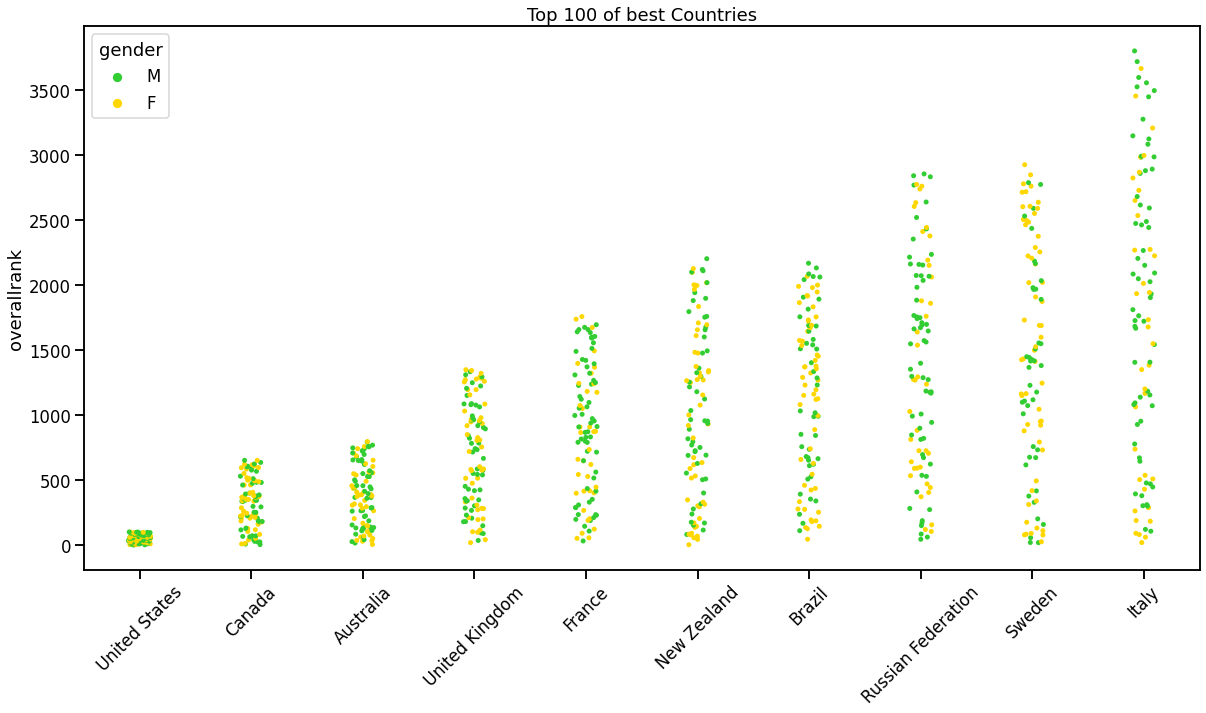

In [565]:
plt.figure(figsize=(20,10))
g = sns.stripplot(
    data=df_tot,
    x='countryoforiginname',
    y='overallrank',
    hue='gender',
    palette={"F": "gold", "M": "limegreen"},
    edgecolor='black'
)
g.set_title('Top 100 of best Countries')
g.set_xlabel('')
plt.xticks(rotation=45)
plt.show()

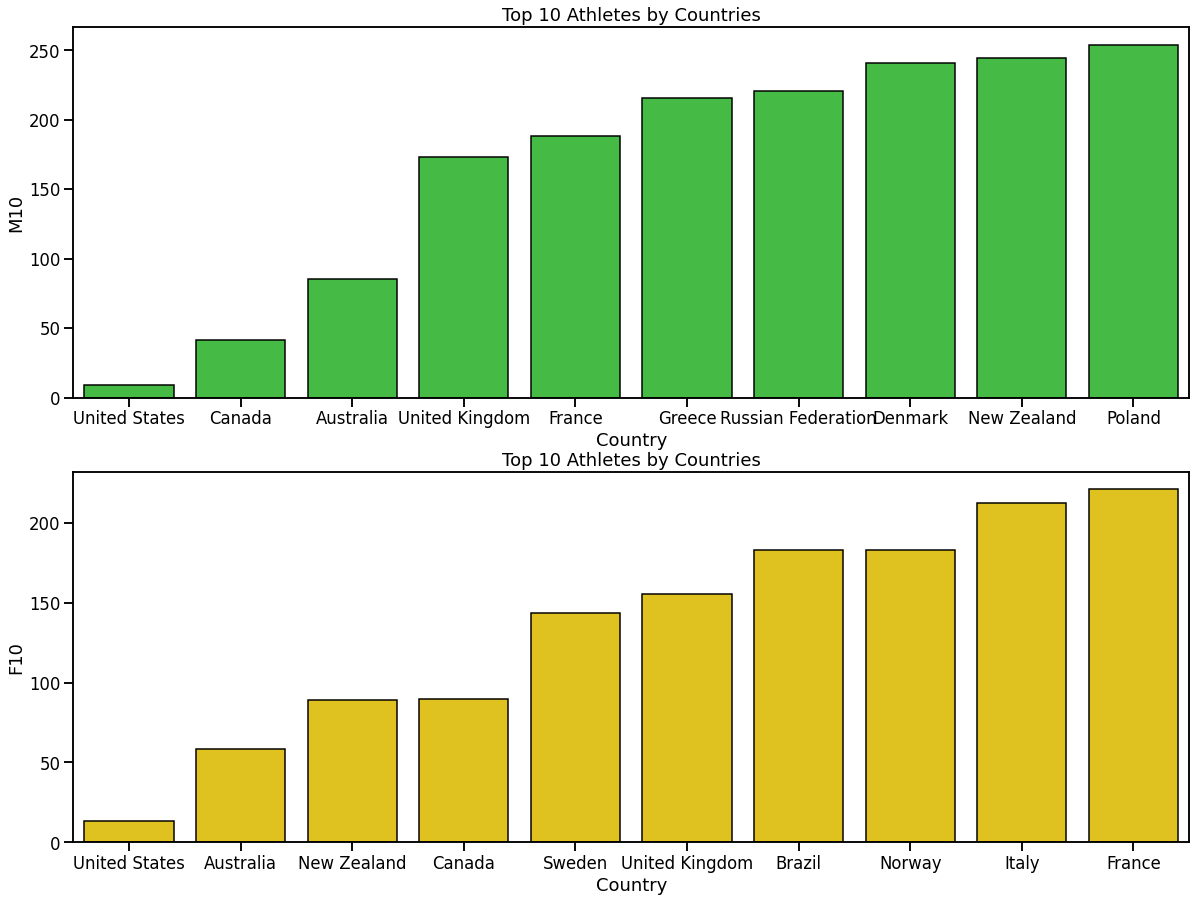

In [116]:
fig, axes = plt.subplots(2,1,figsize=(20,15))

sns.barplot(
    ax=axes[0],
    x=df_cr.sort_values(by='M10')['Country'][:10],
    y=df_cr.sort_values(by='M10')['M10'][:10],
    color='limegreen',
    edgecolor='black'
).set_title('Top 10 Athletes by Countries')

sns.barplot(
    ax=axes[1],
    x=df_cr.sort_values(by='F10')['Country'][:10],
    y=df_cr.sort_values(by='F10')['F10'][:10],
    color='gold',
    edgecolor='black'
).set_title('Top 10 Athletes by Countries');

---
## Influences on HSPU & BMU Ability

In [179]:
df_hspu = df[df['w3_hspu_status'].notna()]
df_hspu['w3_hspu_status'].replace([1.0,0.0],[1,0],inplace=True)
df_hspu = df_hspu.astype({"w3_hspu_status": int})

In [187]:
df_bmu = df[df['w4_bmu_status'].notna()]
df_bmu['w4_bmu_status'].replace([1.0,0.0],[1,0],inplace=True)
df_bmu = df_bmu.astype({"w4_bmu_status": int})

### Influence of Workout Results

In [229]:
print('Average number of total repetitions in 19.1:')
print('Doing one strict HSPU: ', round(df_hspu[(df_hspu['w3_hspu_status']==1)&(df_hspu['scaled_1']==0)]['w1_reps_total'].mean(),1))
print('Not doing strict HSPU: ', round(df_hspu[(df_hspu['w3_hspu_status']==0)&(df_hspu['scaled_1']==0)]['w1_reps_total'].mean(),1))
print()
print('Average number of Squat Cleans in 19.2:')
print('Doing one strict HSPU: ', round(df_hspu[(df_hspu['w3_hspu_status']==1)&(df_hspu['scaled_2']==0)]['w2_reps_sqcl'].mean(),1))
print('Not doing strict HSPU: ', round(df_hspu[(df_hspu['w3_hspu_status']==0)&(df_hspu['scaled_2']==0)]['w2_reps_sqcl'].mean(),1))

Average number of total repetitions in 19.1:
Doing one strict HSPU:  260.0
Not doing strict HSPU:  206.6

Average number of Squat Cleans in 19.2:
Doing one strict HSPU:  23.0
Not doing strict HSPU:  13.5


In [231]:
print('Average number of total repetitions in 19.1:')
print('Doing one BMU: ', round(df_bmu[(df_bmu['w4_bmu_status']==1)&(df_bmu['scaled_1']==0)]['w1_reps_total'].mean(),1))
print('Not doing BMU: ', round(df_bmu[(df_bmu['w4_bmu_status']==0)&(df_bmu['scaled_1']==0)]['w1_reps_total'].mean(),1))
print()
print('Average number of Squat Cleans in 19.2:')
print('Doing one BMU: ', round(df_bmu[(df_bmu['w4_bmu_status']==1)&(df_bmu['scaled_2']==0)]['w2_reps_sqcl'].mean(),1))
print('Not doing BMU: ', round(df_bmu[(df_bmu['w4_bmu_status']==0)&(df_bmu['scaled_2']==0)]['w2_reps_sqcl'].mean(),1))

Average number of total repetitions in 19.1:
Doing one BMU:  256.5
Not doing BMU:  216.0

Average number of Squat Cleans in 19.2:
Doing one BMU:  22.6
Not doing BMU:  15.8


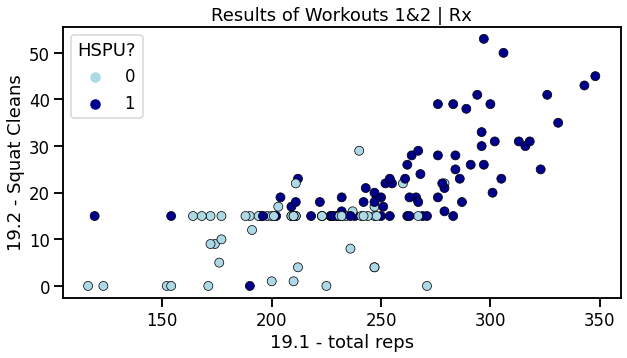

In [458]:
plt.figure(figsize=(10,5))
g = sns.scatterplot(
    data=df_hspu[(df_hspu['scaled_1']==0)&(df_hspu['scaled_2']==0)].sample(150,random_state=10),
    x='w1_reps_total',
    y='w2_reps_sqcl',
    hue='w3_hspu_status',
    edgecolor='black',
    palette={1: "darkblue", 0: "lightblue"},
)
g.set_title('Results of Workouts 1&2 | Rx')
g.set_xlabel('19.1 - total reps')
g.set_ylabel('19.2 - Squat Cleans')
g.legend_.set_title('HSPU?')
plt.show()

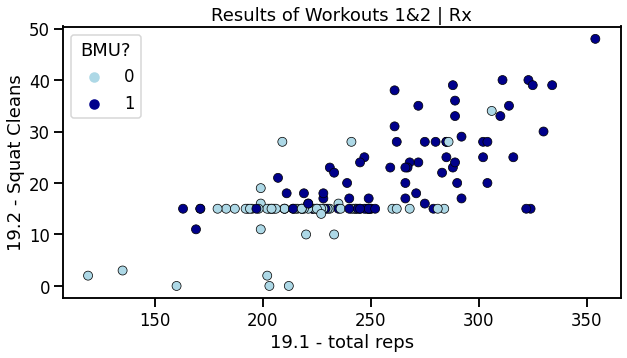

In [459]:
plt.figure(figsize=(10,5))
g = sns.scatterplot(
    data=df_bmu[(df_bmu['scaled_1']==0)&(df_bmu['scaled_2']==0)].sample(150,random_state=10),
    x='w1_reps_total',
    y='w2_reps_sqcl',
    hue='w4_bmu_status',
    edgecolor='black',
    palette={1: "darkblue", 0: "lightblue"}
)
g.set_title('Results of Workouts 1&2 | Rx')
g.set_xlabel('19.1 - total reps')
g.set_ylabel('19.2 - Squat Cleans')
g.legend_.set_title('BMU?')
plt.show()

### Influence of Benchmark Statistics

In [235]:
print('Average 1RM Clean&Jerk:')
print('Doing one strict HSPU: ', round(df_hspu[df_hspu['w3_hspu_status']==1]['bs_cleanandjerk'].mean(),1))
print('Not doing strict HSPU: ', round(df_hspu[df_hspu['w3_hspu_status']==0]['bs_cleanandjerk'].mean(),1))
print()
print('Average 1RM Snatch:')
print('Doing one strict HSPU: ', round(df_hspu[df_hspu['w3_hspu_status']==1]['bs_snatch'].mean(),1))
print('Not doing strict HSPU: ', round(df_hspu[df_hspu['w3_hspu_status']==0]['bs_snatch'].mean(),1))

Average 1RM Clean&Jerk:
Doing one strict HSPU:  102.9
Not doing strict HSPU:  72.9

Average 1RM Snatch:
Doing one strict HSPU:  79.9
Not doing strict HSPU:  55.1


In [236]:
print('Average 1RM Clean&Jerk:')
print('Doing one BMU: ', round(df_bmu[df_bmu['w4_bmu_status']==1]['bs_cleanandjerk'].mean(),1))
print('Not doing BMU: ', round(df_bmu[df_bmu['w4_bmu_status']==0]['bs_cleanandjerk'].mean(),1))
print()
print('Average 1RM Snatch:')
print('Doing one BMU: ', round(df_bmu[df_bmu['w4_bmu_status']==1]['bs_snatch'].mean(),1))
print('Not doing BMU: ', round(df_bmu[df_bmu['w4_bmu_status']==0]['bs_snatch'].mean(),1))

Average 1RM Clean&Jerk:
Doing one BMU:  101.8
Not doing BMU:  79.9

Average 1RM Snatch:
Doing one BMU:  79.0
Not doing BMU:  61.1


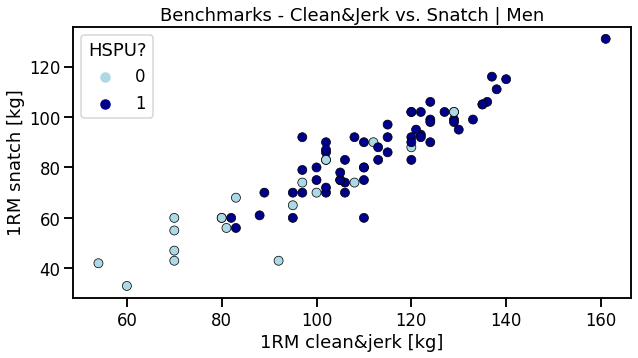

In [463]:
plt.figure(figsize=(10,5))
g = sns.scatterplot(
    data=df_hspu[df_hspu['gender']=='M'].sample(300,random_state=10),
    x='bs_cleanandjerk',
    y='bs_snatch',
    hue='w3_hspu_status',
    palette={1: "darkblue", 0: "lightblue"},
    edgecolor='black'
)
g.set_title('Benchmarks - Clean&Jerk vs. Snatch | Men')
g.set_xlabel('1RM clean&jerk [kg]')
g.set_ylabel('1RM snatch [kg]')
g.legend_.set_title('HSPU?')
plt.show()

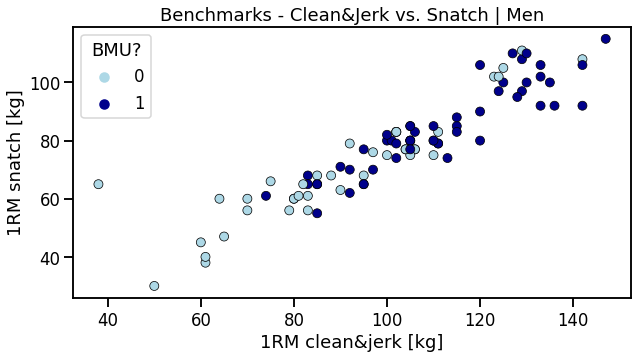

In [462]:
plt.figure(figsize=(10,5))
g = sns.scatterplot(
    data=df_bmu[df_bmu['gender']=='M'].sample(300,random_state=10),
    x='bs_cleanandjerk',
    y='bs_snatch',
    hue='w4_bmu_status',
    palette={1: "darkblue", 0: "lightblue"},
    edgecolor='black'
)
g.set_title('Benchmarks - Clean&Jerk vs. Snatch | Men')
g.set_xlabel('1RM clean&jerk [kg]')
g.set_ylabel('1RM snatch [kg]')
g.legend_.set_title('BMU?')
plt.show()

### Influence of Body Measurement

In [250]:
print('Average Weight (male):')
print('Doing one strict HSPU: ', round(df_hspu[(df_hspu['w3_hspu_status']==1)&(df_hspu['gender']=='M')]['weight'].mean(),1))
print('Not doing strict HSPU: ', round(df_hspu[(df_hspu['w3_hspu_status']==0)&(df_hspu['gender']=='M')]['weight'].mean(),1))
print()
print('Average Height (male):')
print('Doing one strict HSPU: ', round(df_hspu[(df_hspu['w3_hspu_status']==1)&(df_hspu['gender']=='M')]['height'].mean(),2))
print('Not doing strict HSPU: ', round(df_hspu[(df_hspu['w3_hspu_status']==0)&(df_hspu['gender']=='M')]['height'].mean(),2))

Average Weight (male):
Doing one strict HSPU:  83.3
Not doing strict HSPU:  86.3

Average Height (male):
Doing one strict HSPU:  1.78
Not doing strict HSPU:  1.8


In [255]:
print('Average Weight (male):')
print('Doing one BMU: ', round(df_bmu[(df_bmu['w4_bmu_status']==1)&(df_bmu['gender']=='M')]['weight'].mean(),1))
print('Not doing BMU: ', round(df_bmu[(df_bmu['w4_bmu_status']==0)&(df_bmu['gender']=='M')]['weight'].mean(),1))
print()
print('Average Height (male):')
print('Doing one BMU: ', round(df_bmu[(df_bmu['w4_bmu_status']==1)&(df_bmu['gender']=='M')]['height'].mean(),2))
print('Not doing BMU: ', round(df_bmu[(df_bmu['w4_bmu_status']==0)&(df_bmu['gender']=='M')]['height'].mean(),2))

Average Weight (male):
Doing one BMU:  83.1
Not doing BMU:  85.8

Average Height (male):
Doing one BMU:  1.79
Not doing BMU:  1.79


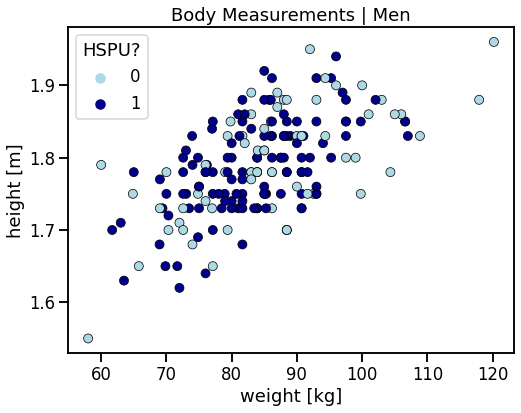

In [455]:
plt.figure(figsize=(8,6))
g = sns.scatterplot(
    data=df_hspu[df_hspu['gender']=='M'].sample(300,random_state=10),
    x='weight',
    y='height',
    hue='w3_hspu_status',
    palette={1: "darkblue", 0: "lightblue"},
    edgecolor='black'
)
g.set_title('Body Measurements | Men')
g.set_xlabel('weight [kg]')
g.set_ylabel('height [m]')
g.legend_.set_title('HSPU?')
plt.show()

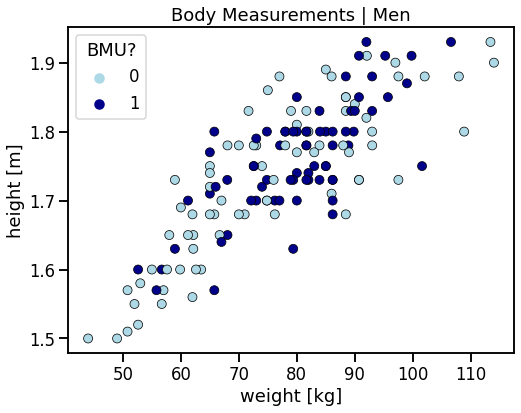

In [464]:
plt.figure(figsize=(8,6))
g = sns.scatterplot(
    data=df_bmu.sample(300,random_state=10),
    x='weight',
    y='height',
    hue='w4_bmu_status',
    palette={1: "darkblue", 0: "lightblue"},
    edgecolor='black'
)
g.set_title('Body Measurements | Men')
g.set_xlabel('weight [kg]')
g.set_ylabel('height [m]')
g.legend_.set_title('BMU?')
plt.show()

---
## Influence of Scaling on Ranking

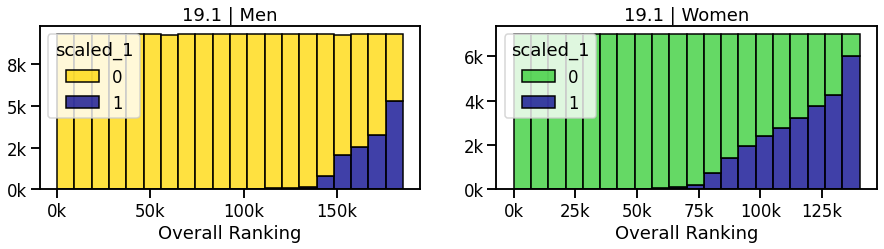

In [471]:
fig, axes = plt.subplots(1,2,figsize=(15,3))

a = sns.histplot(
    ax=axes[0],
    data=df[(df['division']=='Men')],
    x='overallrank',
    hue='scaled_1',
    bins=20,
    multiple='stack',
    palette={1: "darkblue", 0: "gold"}
)
a.set_title('19.1 | Men')
a.set_ylabel('')
a.set_xlabel('Overall Ranking')
ylabels = ['{:,.0f}'.format(y) + 'k' for y in a.get_yticks()/1000]
xlabels = ['{:,.0f}'.format(x) + 'k' for x in a.get_xticks()/1000]
a.set_yticklabels(ylabels)
a.set_xticklabels(xlabels)

b = sns.histplot(
    ax=axes[1],
    data=df[(df['division']=='Women')],
    x='overallrank',
    hue='scaled_1',
    bins=20,
    multiple='stack',
    palette={1: "darkblue", 0: "limegreen"}
)
b.set_title('19.1 | Women')
b.set_ylabel('')
b.set_xlabel('Overall Ranking')
ylabels = ['{:,.0f}'.format(y) + 'k' for y in b.get_yticks()/1000]
xlabels = ['{:,.0f}'.format(x) + 'k' for x in b.get_xticks()/1000]
b.set_yticklabels(ylabels)
b.set_xticklabels(xlabels);

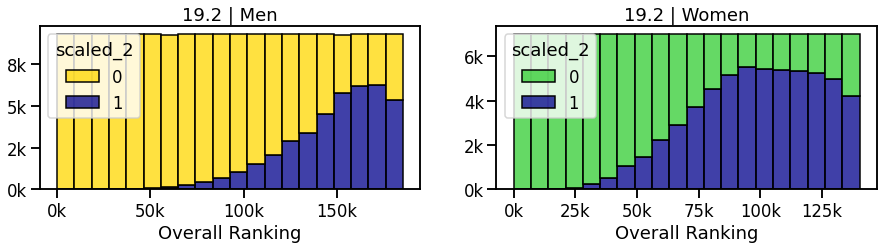

In [476]:
fig, axes = plt.subplots(1,2,figsize=(15,3))

a = sns.histplot(
    ax=axes[0],
    data=df[(df['division']=='Men')],
    x='overallrank',
    hue='scaled_2',
    bins=20,
    multiple='stack',
    palette={1: "darkblue", 0: "gold"}
)
a.set_title('19.2 | Men')
a.set_ylabel('')
a.set_xlabel('Overall Ranking')
ylabels = ['{:,.0f}'.format(y) + 'k' for y in a.get_yticks()/1000]
xlabels = ['{:,.0f}'.format(x) + 'k' for x in a.get_xticks()/1000]
a.set_yticklabels(ylabels)
a.set_xticklabels(xlabels)

b = sns.histplot(
    ax=axes[1],
    data=df[(df['division']=='Women')],
    x='overallrank',
    hue='scaled_2',
    bins=20,
    multiple='stack',
    palette={1: "darkblue", 0: "limegreen"}
)
b.set_title('19.2 | Women')
b.set_ylabel('')
b.set_xlabel('Overall Ranking')
ylabels = ['{:,.0f}'.format(y) + 'k' for y in b.get_yticks()/1000]
xlabels = ['{:,.0f}'.format(x) + 'k' for x in b.get_xticks()/1000]
b.set_yticklabels(ylabels)
b.set_xticklabels(xlabels);

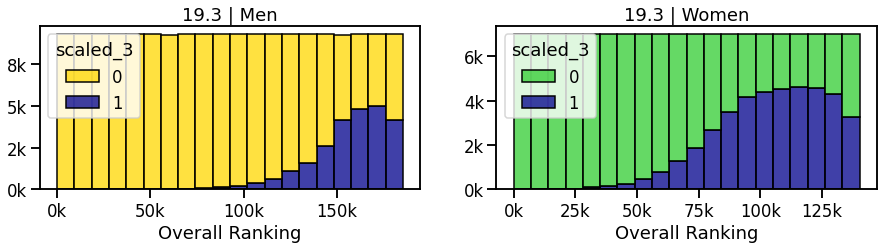

In [477]:
fig, axes = plt.subplots(1,2,figsize=(15,3))

a = sns.histplot(
    ax=axes[0],
    data=df[(df['division']=='Men')],
    x='overallrank',
    hue='scaled_3',
    bins=20,
    multiple='stack',
    palette={1: "darkblue", 0: "gold"}
)
a.set_title('19.3 | Men')
a.set_ylabel('')
a.set_xlabel('Overall Ranking')
ylabels = ['{:,.0f}'.format(y) + 'k' for y in a.get_yticks()/1000]
xlabels = ['{:,.0f}'.format(x) + 'k' for x in a.get_xticks()/1000]
a.set_yticklabels(ylabels)
a.set_xticklabels(xlabels)

b = sns.histplot(
    ax=axes[1],
    data=df[(df['division']=='Women')],
    x='overallrank',
    hue='scaled_3',
    bins=20,
    multiple='stack',
    palette={1: "darkblue", 0: "limegreen"}
)
b.set_title('19.3 | Women')
b.set_ylabel('')
b.set_xlabel('Overall Ranking')
ylabels = ['{:,.0f}'.format(y) + 'k' for y in b.get_yticks()/1000]
xlabels = ['{:,.0f}'.format(x) + 'k' for x in b.get_xticks()/1000]
b.set_yticklabels(ylabels)
b.set_xticklabels(xlabels);

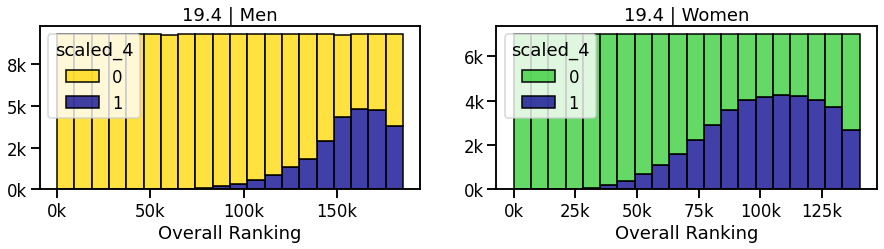

In [478]:
fig, axes = plt.subplots(1,2,figsize=(15,3))

a = sns.histplot(
    ax=axes[0],
    data=df[(df['division']=='Men')],
    x='overallrank',
    hue='scaled_4',
    bins=20,
    multiple='stack',
    palette={1: "darkblue", 0: "gold"}
)
a.set_title('19.4 | Men')
a.set_ylabel('')
a.set_xlabel('Overall Ranking')
ylabels = ['{:,.0f}'.format(y) + 'k' for y in a.get_yticks()/1000]
xlabels = ['{:,.0f}'.format(x) + 'k' for x in a.get_xticks()/1000]
a.set_yticklabels(ylabels)
a.set_xticklabels(xlabels)

b = sns.histplot(
    ax=axes[1],
    data=df[(df['division']=='Women')],
    x='overallrank',
    hue='scaled_4',
    bins=20,
    multiple='stack',
    palette={1: "darkblue", 0: "limegreen"}
)
b.set_title('19.4 | Women')
b.set_ylabel('')
b.set_xlabel('Overall Ranking')
ylabels = ['{:,.0f}'.format(y) + 'k' for y in b.get_yticks()/1000]
xlabels = ['{:,.0f}'.format(x) + 'k' for x in b.get_xticks()/1000]
b.set_yticklabels(ylabels)
b.set_xticklabels(xlabels);

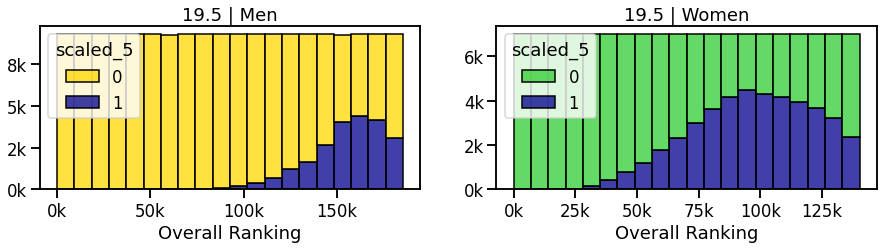

In [479]:
fig, axes = plt.subplots(1,2,figsize=(15,3))

a = sns.histplot(
    ax=axes[0],
    data=df[(df['division']=='Men')],
    x='overallrank',
    hue='scaled_5',
    bins=20,
    multiple='stack',
    palette={1: "darkblue", 0: "gold"}
)
a.set_title('19.5 | Men')
a.set_ylabel('')
a.set_xlabel('Overall Ranking')
ylabels = ['{:,.0f}'.format(y) + 'k' for y in a.get_yticks()/1000]
xlabels = ['{:,.0f}'.format(x) + 'k' for x in a.get_xticks()/1000]
a.set_yticklabels(ylabels)
a.set_xticklabels(xlabels)

b = sns.histplot(
    ax=axes[1],
    data=df[(df['division']=='Women')],
    x='overallrank',
    hue='scaled_5',
    bins=20,
    multiple='stack',
    palette={1: "darkblue", 0: "limegreen"}
)
b.set_title('19.5 | Women')
b.set_ylabel('')
b.set_xlabel('Overall Ranking')
ylabels = ['{:,.0f}'.format(y) + 'k' for y in b.get_yticks()/1000]
xlabels = ['{:,.0f}'.format(x) + 'k' for x in b.get_xticks()/1000]
b.set_yticklabels(ylabels)
b.set_xticklabels(xlabels);